<a href="https://colab.research.google.com/github/akashganesan1/Flight-Price-Prediction/blob/main/Flight_Fare_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flight Fare Prediction Web App Project With Deployment

*Author: Preet Mehta*


## Table of Contents

1. Establishing connection with kaggle
2. Importing libraries
3. Importing dataset    
4. Basic Text Data Pre-processing & Cleaning Text Data
5. Preparing Data for Exploratory Data Analysis (EDA)
6. Exploratory Data Analysis
7. Feature Selection
8. Data modelling
9. Conclusion
10. Reference


![Image](https://raw.githubusercontent.com/vinaysaw/flight-price-prediction/main/static/img/background.jpg)

In [2]:
from google.colab import drive
drive._mount('/content/drive',force_remount=True)

ValueError: ignored

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


># **1- Importing dataset ditectly from kaggle**
---

In [4]:
! pip install kaggle
! mkdir ~/.kaggle
! cp '/content/drive/MyDrive/Colab Notebooks/Data/kaggle.json' ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
from google.colab import files
files.upload()
#upload your kaggle credentials json file
#creating a directory
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
# Providing permission
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
#Downloading game of thrones twitter dataset
!kaggle datasets download -d nikhilmittal/flight-fare-prediction-mh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/Data/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Saving Data_Train.xlsx to Data_Train.xlsx
Saving Sample_submission.xlsx to Sample_submission.xlsx
Saving Test_set.xlsx to Test_set.xlsx
mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.9/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.9/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.9/dist

In [5]:
!unzip '/content/flight-fare-prediction-mh.zip'

unzip:  cannot find or open /content/flight-fare-prediction-mh.zip, /content/flight-fare-prediction-mh.zip.zip or /content/flight-fare-prediction-mh.zip.ZIP.


># **2- Importing libraries**
---

**pyforest**

This package aims to add all the libraries that account for more than 99% of the imports, including popular libraries such as pandas as pd, NumPy as np, matplotlob.pyplot as plt, seaborn as sns, and many more. In addition to these libraries, it also some helper modules such as os, tqdm, re, and many more.

Use dir(pyforest) to see which packages are included in pyforest

In [6]:
!pip install pyforest
import pyforest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
! pip install xgboost
import xgboost as xgb
from sklearn.metrics import r2_score,make_scorer
from sklearn.model_selection import cross_val_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14606 sha256=900efbc302f93c62f4e53abd413be867f0dd591669dee1f4eb65f730088821ad
  Stored in directory: /root/.cache/pip/wheels/d5/1a/3e/6193fe1c56168f5df4aef57d8411033ba4611881135d495727
Successfully built pyforest
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
# # import packages
# import pandas as pd
# import numpy as np
# import seaborn as sns

# import matplotlib.pyplot as plt
# import matplotlib.mlab as mlab
# import matplotlib
# plt.style.use('ggplot')
# from matplotlib.pyplot import figure

# %matplotlib inline
# matplotlib.rcParams['figure.figsize'] = (12,8)

# pd.options.mode.chained_assignment = None

# import spacy
# import en_core_web_sm

# nlp = en_core_web_sm.load()
# #removing stop words
# import nltk
# from nltk.corpus import stopwords

# !pip install stop_words
# from stop_words import get_stop_words
# nltk.download('stopwords')
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords

# from nltk.stem import WordNetLemmatizer,PorterStemmer
# from nltk.tokenize import word_tokenize
# from wordcloud import WordCloud, STOPWORDS
# import nltk
# nltk.download('punkt')
# nltk.download('wordnet')
# from pandas import read_csv
# from pandas.plotting import scatter_matrix
# from matplotlib import pyplot
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC

># **3- Importing dataset**
---

In [8]:
df=pd.read_excel('/content/Data_Train.xlsx')
df.head()

<IPython.core.display.Javascript object>

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


> # **4- Basic Text Data Pre-processing**
---

Training data

**Dimensions of Dataset**

We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

In [9]:
print(df.shape)

(10683, 11)


**Statistical Summary**

Now we can take a look at a summary of each attribute.

This includes the count, mean, the min and max values as well as some percentiles.

In [10]:
print(df.describe())

              Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000


Check for null values.

In [11]:
##checking for all the null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Check for outliers in Price column

<IPython.core.display.Javascript object>

<Axes: xlabel='Price'>

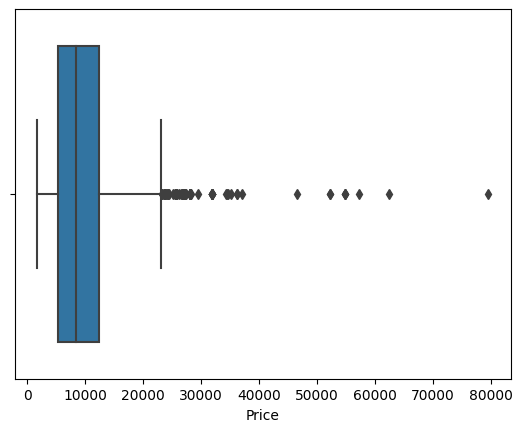

In [12]:
##looking at Price box plot
sns.boxplot(x=df['Price'])

Check for data type of columns

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


We can see here that except price all are categorical values. But we need to change the datatype for respective columns and clean it

Let's check the frequency of the duration of flights

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: ylabel='Duration'>

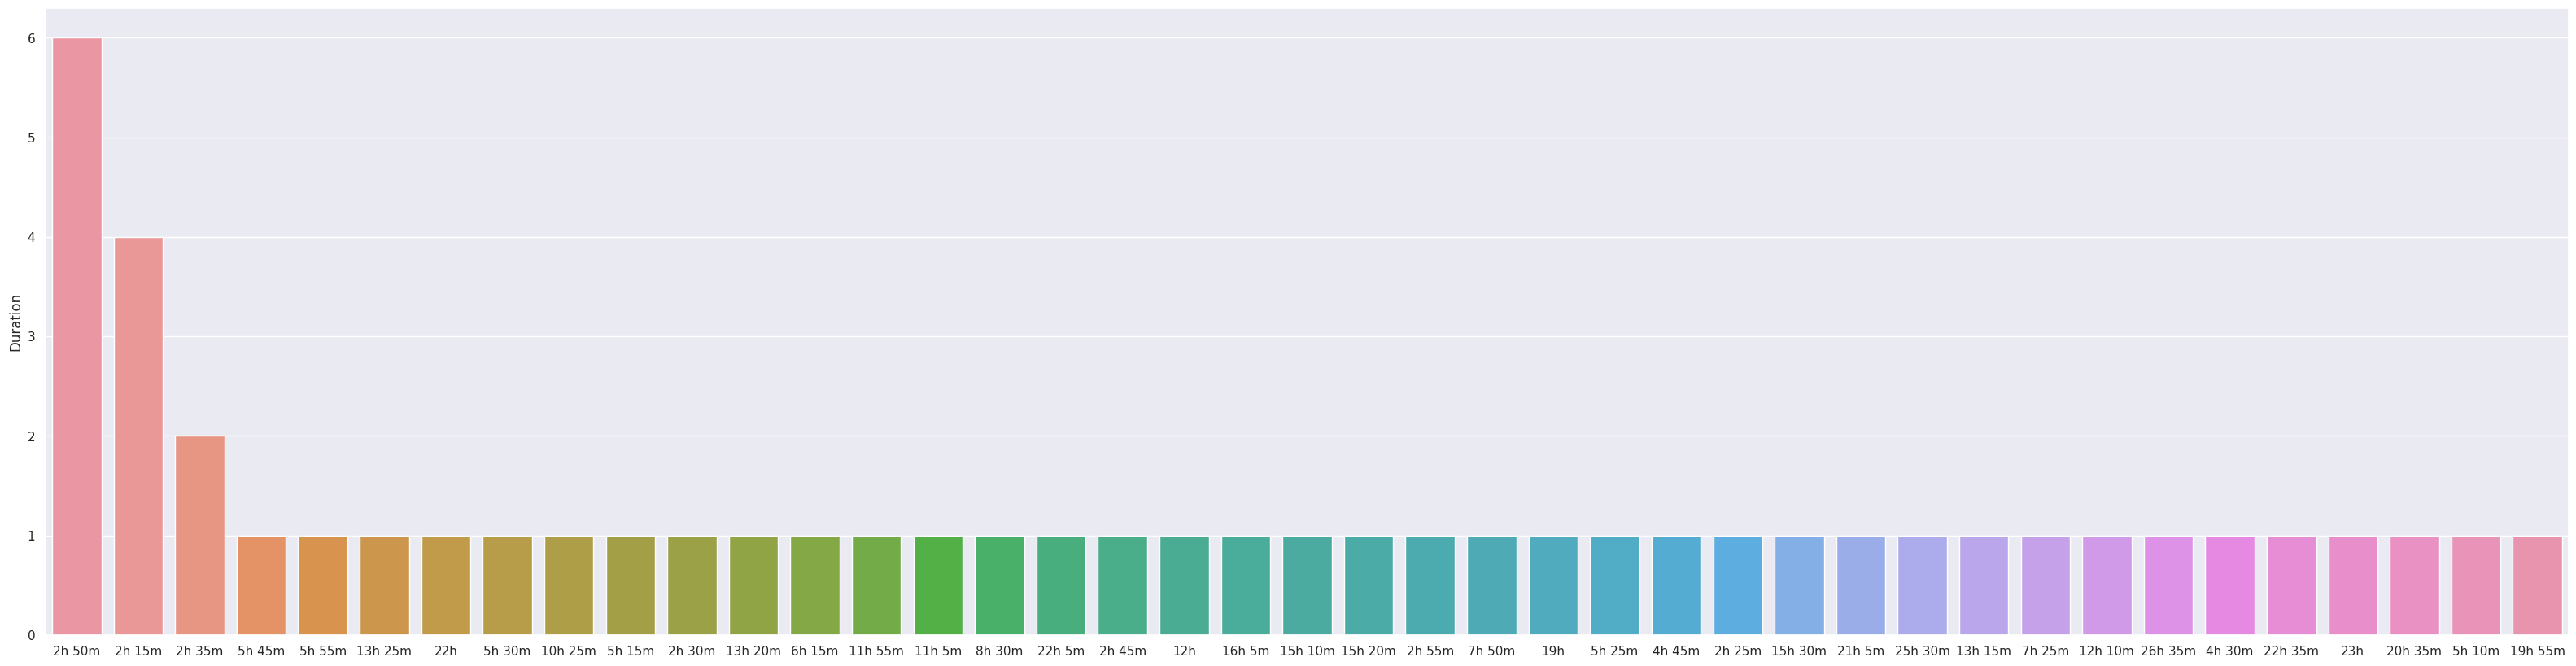

In [14]:
sns.set(rc = {'figure.figsize':(40,10)})
sns.barplot(x=df.Duration[:50].value_counts().index, y=df.Duration[:50].value_counts())

> # **5- Preparing Data for Exploratory Data Analysis (EDA)**

First lets convert Departure date in Date format

In [15]:
df['Day_of_Journey']=pd.to_datetime(df['Date_of_Journey']).map(lambda x: x.strftime('%d'))
df['Month_of_Journey']=pd.to_datetime(df['Date_of_Journey']).map(lambda x: x.strftime('%m'))
df['Year_of_Journey']=pd.to_datetime(df['Date_of_Journey']).map(lambda x: x.strftime('%Y'))

<IPython.core.display.Javascript object>

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime

<IPython.core.display.Javascript object>

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime

<IPython.core.display.Javascript object>

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime

Let's check how many years of data we have

In [16]:
df['Year_of_Journey'].nunique()

1

Deleting the df['Year_of_Journey'] & df['Date_of_Journey'] as we only have 1 year of data

In [17]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

Now lets get hours and mins from Departure Time

In [18]:
df['Dep_Hour']=pd.to_datetime(df['Dep_Time']).map(lambda x: x.strftime('%H'))
df['Dep_Min']=pd.to_datetime(df['Dep_Time']).map(lambda x: x.strftime('%M'))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Now removing departure time

In [19]:
df.drop(['Dep_Time'],axis=1,inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: ylabel='Day_of_Journey'>

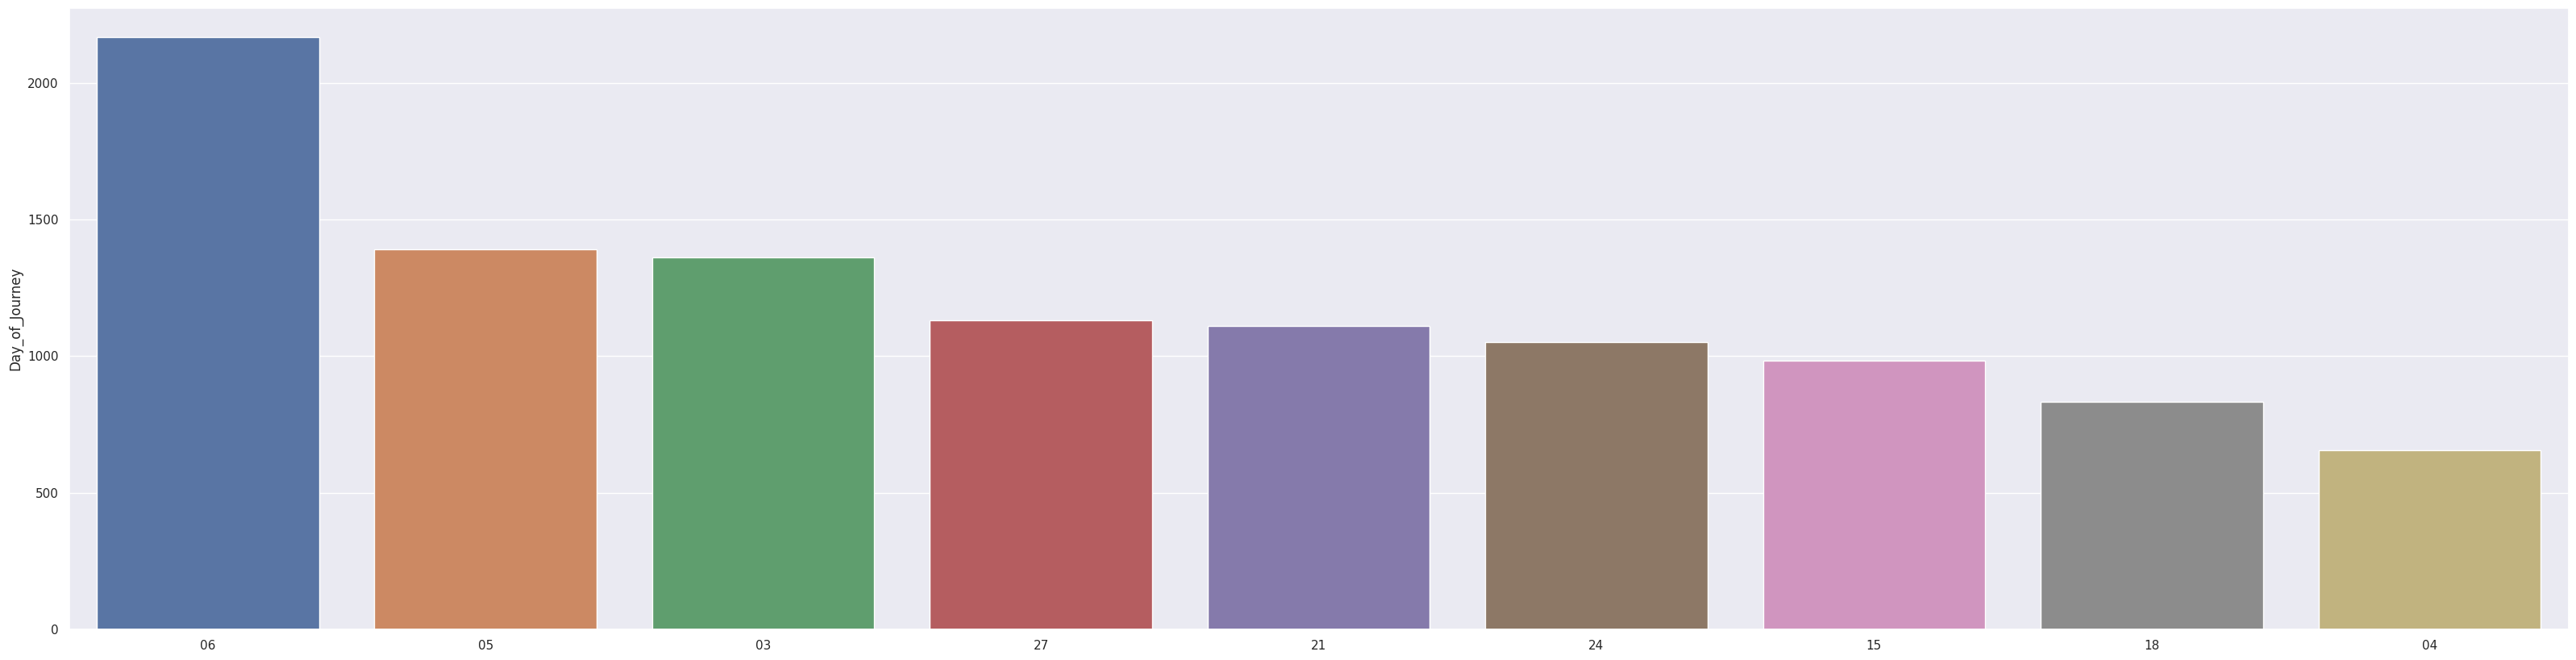

In [20]:
sns.set(rc = {'figure.figsize':(40,10)})
sns.barplot(x=df.Day_of_Journey.value_counts().index, y=df.Day_of_Journey.value_counts())

Now lets get hours and mins from Arrival Time

In [21]:
df['Arrival_Hour']=pd.to_datetime(df['Arrival_Time']).map(lambda x: x.strftime('%H'))
df['Arrival_Min']=pd.to_datetime(df['Arrival_Time']).map(lambda x: x.strftime('%M'))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Now we dont need arrival time column

In [22]:
df.drop(['Arrival_Time'],axis=1,inplace=True)

Splitting Duration

In [23]:
new = df['Duration'].str.split(" ", n = 2, expand = True)
  
# making separate Hours column from new data frame
df["Duration_Hours"]= new[0]
  
# making separate Minutes column from new data frame
df["Duration_Minutes"]= new[1]

#Removing letters from string
df["Duration_Hours"] = df["Duration_Hours"].str.replace(r'\D', '')
df["Duration_Minutes"] = df["Duration_Minutes"].str.replace(r'\D', '')


<ipython-input-23-a0415d9536c8>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Duration_Hours"] = df["Duration_Hours"].str.replace(r'\D', '')
<ipython-input-23-a0415d9536c8>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Duration_Minutes"] = df["Duration_Minutes"].str.replace(r'\D', '')


Now we dont need duration column

In [24]:
df.drop(['Duration'],axis=1,inplace=True)

Removing word "stops" from Total_Stops column

In [25]:
new = df['Total_Stops'].str.split(" ", n = 2, expand = True)
df["Total_Stops"]= new[0]
df['Total_Stops'].replace(to_replace = ['non-stop'], value = [0],inplace=True)

Replacing nan values with zero

In [26]:
df.isnull().sum()

Airline                0
Source                 0
Destination            0
Route                  1
Total_Stops            1
Additional_Info        0
Price                  0
Day_of_Journey         0
Month_of_Journey       0
Year_of_Journey        0
Dep_Hour               0
Dep_Min                0
Arrival_Hour           0
Arrival_Min            0
Duration_Hours         0
Duration_Minutes    1032
dtype: int64

In [27]:
df['Duration_Minutes']=df['Duration_Minutes'].fillna(0)
df['Total_Stops']=df['Total_Stops'].fillna(0)

Removing "Route" as it is not adding any value. Infact it is explained very well by "Total Stops". Moreover, "Additional-info" is also not required

In [28]:
#data represnted in this manner is of no use
df["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10683, dtype: object

In [29]:
# more than 80% of values are No-info
df['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [30]:
df.drop(['Additional_Info','Route'],axis=1,inplace=True)

In [31]:
df.head(3)

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,03,2019,22,20,01,10,2,50
1,Air India,Kolkata,Banglore,2,7662,05,01,2019,05,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,06,09,2019,09,25,04,25,19,0


> # **6- Exploratory data analysis**

**Handling categorical data**
- For nominal data (where there is no order)-> OneHotencoder 
- For Ordinal data (where we have order) -> Label Encoder

**So here is the plan:**

Once we are done with onehotencoding of all categorical columns, we will concat them with main dataframe

Now lets perform it for "Airlines"

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: ylabel='Airline'>

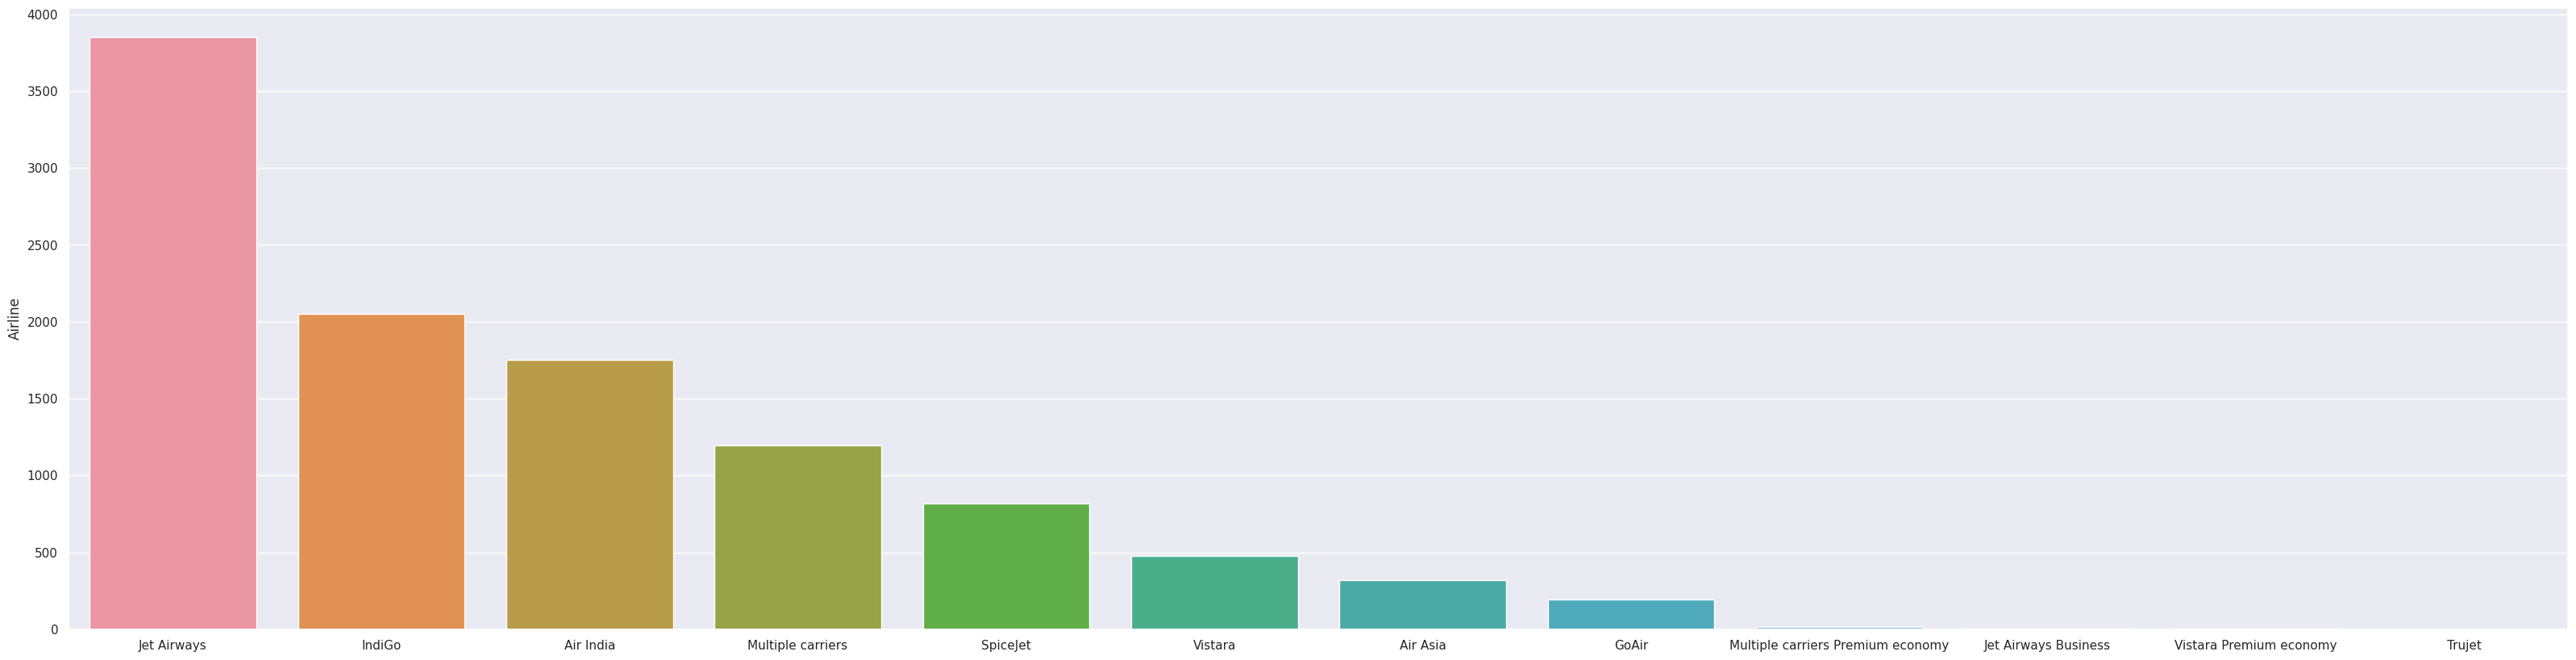

In [32]:
sns.set(rc = {'figure.figsize':(40,10)})
sns.barplot(x=df.Airline.value_counts().index, y=df.Airline.value_counts())

In [33]:
# sns.catplot(x="Airline", y="Price", data=df, kind='swarm', height=5, aspect=2)

<IPython.core.display.Javascript object>

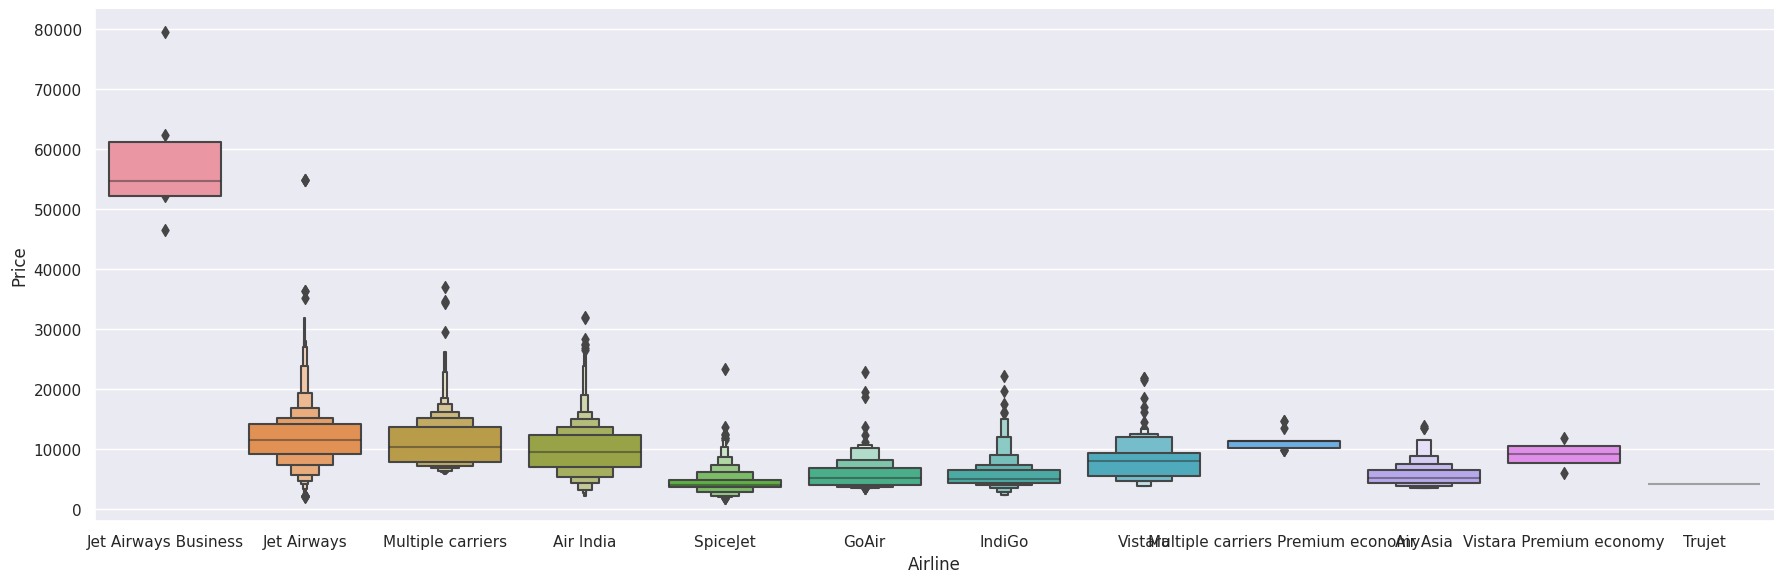

In [34]:
sns.catplot(x="Airline", y="Price", data=df.sort_values("Price",ascending=False), kind='boxen', height=6, aspect=3)

We need to perform onehotencoding as we dont have order in this category

**One Hot Encoding** is a process in the data processing that is applied to categorical data, to convert it into a binary vector representation for use in machine learning algorithms

By default, the **get_dummies()** does not do dummy encoding, but One-Hot encoding. To produce an actual dummy encoding from a DataFrame, we need to pass ```drop_first=True```

In [35]:
# df_airline=df['Airline']
df_Airline=pd.get_dummies(df['Airline'], prefix="Airline")
df_Airline
#using drop_first=True one column will reduce, which will be represented by all values as zero

<IPython.core.display.Javascript object>

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1,0,0,0,0,0,0,0,0,0,0,0
10679,0,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,0,1,0


Now lets perform it for Source

<IPython.core.display.Javascript object>

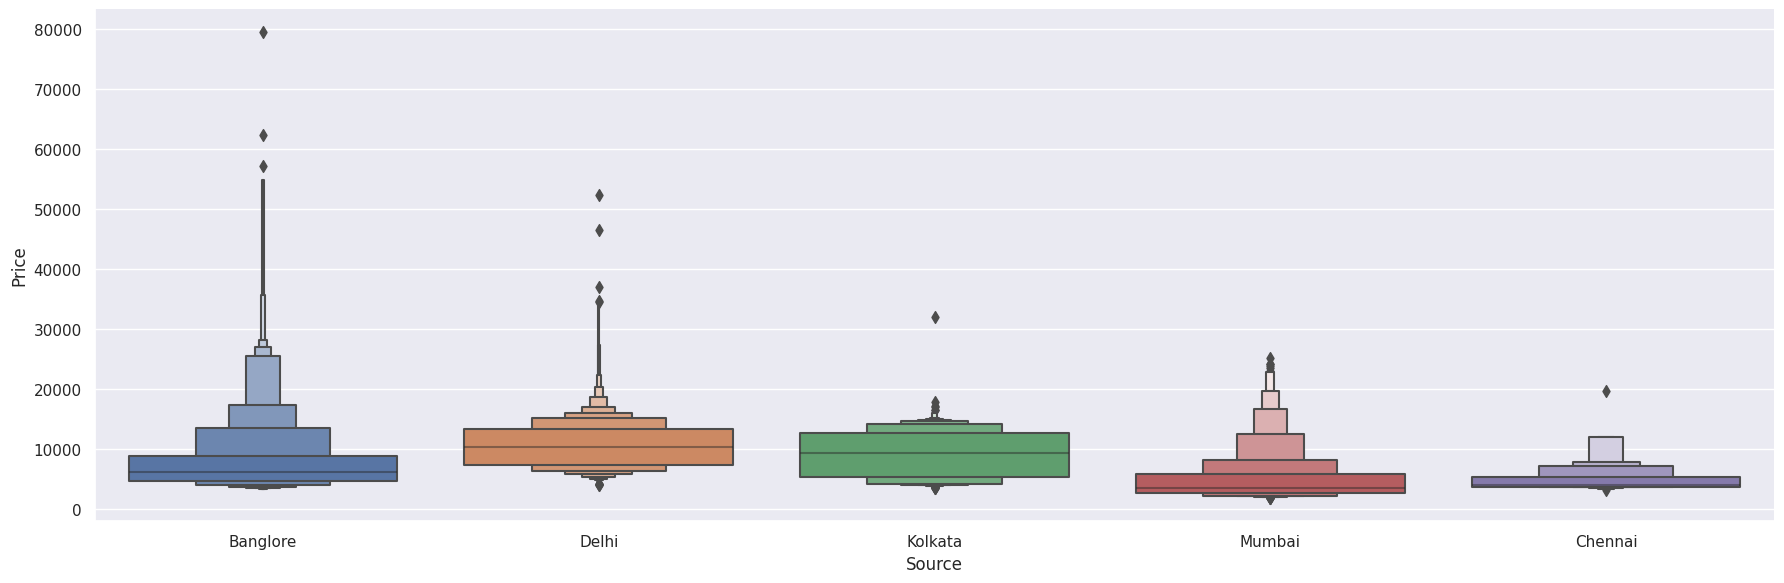

In [36]:
sns.catplot(x="Source", y="Price", data=df.sort_values("Price",ascending=False), kind='boxen', height=6, aspect=3)

In [37]:
df_Source=pd.get_dummies(df['Source'], prefix="Source")
df_Source

#Banglore is dropped here becuase it had all zeros
#using drop_first=True one column will reduce, which will be represented by all values as zero

<IPython.core.display.Javascript object>

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0
...,...,...,...,...,...
10678,0,0,0,1,0
10679,0,0,0,1,0
10680,1,0,0,0,0
10681,1,0,0,0,0


Now lets perform for destination

<IPython.core.display.Javascript object>

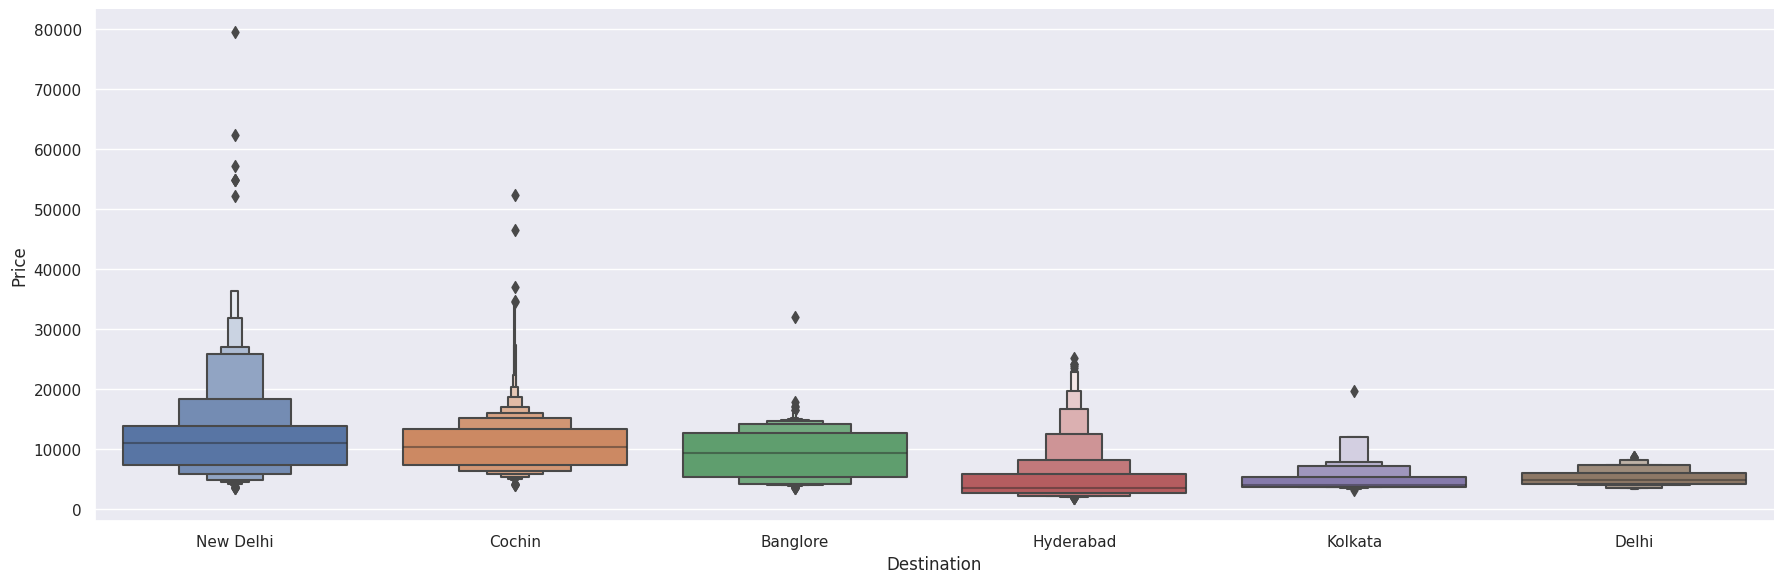

In [38]:
sns.catplot(x="Destination", y="Price", data=df.sort_values("Price",ascending=False), kind='boxen', height=6, aspect=3)

In [39]:
df_Destination=pd.get_dummies(df['Destination'], prefix="Destination")
df_Destination
#Banglore is dropped here becuase it had all zeros
#using drop_first=True one column will reduce, which will be represented by all values as zero

<IPython.core.display.Javascript object>

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
10678,1,0,0,0,0,0
10679,1,0,0,0,0,0
10680,0,0,1,0,0,0
10681,0,0,0,0,0,1


Now, as planned, lets concat all the onehotencodings with main dataframe

In [40]:
df = pd.concat([df, df_Airline,df_Source,df_Destination ], axis=1)
df.head(3)

<IPython.core.display.Javascript object>

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,03,2019,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,05,01,2019,05,50,...,0,0,1,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,06,09,2019,09,25,...,0,1,0,0,0,1,0,0,0,0


Now we dont require "Airline", "Source", and "Destination" columns

In [41]:
df.drop(['Airline','Destination','Source'],axis=1,inplace=True)

> ### Test data

Performing all the steps that we did for Training dataset in Testing dataset

The reason we didn't do it together is "Data leakage". However, in kaggle competetions it is done together

In [42]:
#Importing the testing dataset
df_test=pd.read_excel('/content/Test_set.xlsx')
#df_test.head()
print(u'\u2500' * 110)
print("Shape:",df_test.shape)
#print(df.describe())

#print(u'\u2500' * 110)

#Basic test data pre-processing
##checking for all the null values

#df_test.isnull().sum()

#df_test.info()

print(u'\u2500' * 110)

#Preparing for EDA

#Splitting "Date_of_Journey"
df_test['Day_of_Journey']=pd.to_datetime(df_test['Date_of_Journey']).map(lambda x: x.strftime('%d'))
df_test['Month_of_Journey']=pd.to_datetime(df_test['Date_of_Journey']).map(lambda x: x.strftime('%m'))
df_test['Year_of_Journey']=pd.to_datetime(df_test['Date_of_Journey']).map(lambda x: x.strftime('%Y'))

#Deleting 'Date_of_Journey'
df_test.drop(['Date_of_Journey'],axis=1,inplace=True)

#Splitting "Departure Time"

df_test['Dep_Hour']=pd.to_datetime(df_test['Dep_Time']).map(lambda x: x.strftime('%H'))
df_test['Dep_Min']=pd.to_datetime(df_test['Dep_Time']).map(lambda x: x.strftime('%M'))
df_test.drop(['Dep_Time'],axis=1,inplace=True)

# Splitting Arrival Time
df_test['Arrival_Hour']=pd.to_datetime(df_test['Arrival_Time']).map(lambda x: x.strftime('%H'))
df_test['Arrival_Min']=pd.to_datetime(df_test['Arrival_Time']).map(lambda x: x.strftime('%M'))
df_test.drop(['Arrival_Time'],axis=1,inplace=True)



#Splitting Duration
new = df_test['Duration'].str.split(" ", n = 2, expand = True)
  
# making separate Hours column from new data frame
df_test["Duration_Hours"]= new[0]
  
# making separate Minutes column from new data frame
df_test["Duration_Minutes"]= new[1]

#Removing letters from string
df_test["Duration_Hours"] = df_test["Duration_Hours"].str.replace(r'\D', '')
df_test["Duration_Minutes"] = df_test["Duration_Minutes"].str.replace(r'\D', '')


#Dropping duration column
df_test.drop(['Duration'],axis=1,inplace=True)


#Removing word "stops" from Total_Stops column
new = df_test['Total_Stops'].str.split(" ", n = 2, expand = True)
df_test["Total_Stops"]= new[0]
df_test['Total_Stops'].replace(to_replace = ['non-stop'], value = [0],inplace=True)

df_test['Duration_Minutes']=df['Duration_Minutes'].fillna(0)
df_test['Total_Stops']=df['Total_Stops'].fillna(0)

#Removing "Route" as it is not adding any value. Infact it is explained very well by "Total Stops". Moreover, "Additional-info" is also not required
df_test.drop(['Additional_Info','Route'],axis=1,inplace=True)



#Categorical data

#Onehotencoding of Airline

df_Airline=pd.get_dummies(df_test['Airline'], prefix="Airline")

#Onehotencoding of Source
df_Source=pd.get_dummies(df_test['Source'], prefix="Source")

#Onehotencoding of Destination
df_Destination=pd.get_dummies(df_test['Destination'], prefix="Destination")

#Concat of all df
df_test = pd.concat([df_test, df_Airline,df_Source,df_Destination ], axis=1)

df_test.drop(['Airline','Destination','Source'],axis=1,inplace=True)
df_test.head(3)

<IPython.core.display.Javascript object>

──────────────────────────────────────────────────────────────────────────────────────────────────────────────
Shape: (2671, 10)
──────────────────────────────────────────────────────────────────────────────────────────────────────────────


<IPython.core.display.Javascript object>

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '21/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '15/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '18/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime

<IPython.core.display.Javascript object>

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '21/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '15/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '18/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime

<IPython.core.display.Javascript object>

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '21/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '15/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '18/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-42-c86d97d1ba8e>:52: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test["Duration_Hours"] = df_test["Duration_Hours"].str.replace(r'\D', '')
<ipython-input-42-c86d97d1ba8e>:53: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test["Duration_Minutes"] = df_test["Duration_Minutes"].str.replace(r'\D', '')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Total_Stops,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Minutes,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,06,06,2019,17,30,04,25,10,50,...,0,1,0,0,0,1,0,0,0,0
1,2,05,12,2019,06,20,10,20,4,25,...,0,0,1,0,1,0,0,0,0,0
2,2,21,05,2019,19,15,19,00,23,0,...,0,1,0,0,0,1,0,0,0,0


> # **7. Feature Selection**

Benefits of performing feature selection before modeling your data

· Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.

· Improves Accuracy: Less misleading data means modeling accuracy improves.

· Reduces Training Time: fewer data points reduce algorithm complexity and algorithms train faster.

Feature Selection Methods
3 Feature selection techniques that are easy to use and also gives good results:
```
1. Univariate Selection
2. Feature Importance.
3. Correlation Matrix with Heatmap.
```

[Reference](https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e)

> ### **1. Univariate Selection**

Statistical tests can be used to select those features that have the strongest relationship with the output variable.
The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Airplane Price Prediction Dataset.

In [43]:
X = df[df.columns.difference(["Price"])] #independent columns
X.shape

(10683, 33)

In [44]:
y=df['Price'] #target column i.e price range

In [45]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores['Score']=featureScores['Score'].round(0)
print(featureScores.nlargest(10,'Score'))  #print 10 best features

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                              Specs    Score
16                          Dep_Min  68392.0
23                   Duration_Hours  58836.0
13                      Arrival_Min  50443.0
24                 Duration_Minutes  44477.0
14                   Day_of_Journey  27072.0
12                     Arrival_Hour  18961.0
15                         Dep_Hour  11058.0
9                    Airline_Trujet  10682.0
11  Airline_Vistara Premium economy  10680.0
5      Airline_Jet Airways Business  10677.0


Representing top 20 features

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Specs', ylabel='Score'>

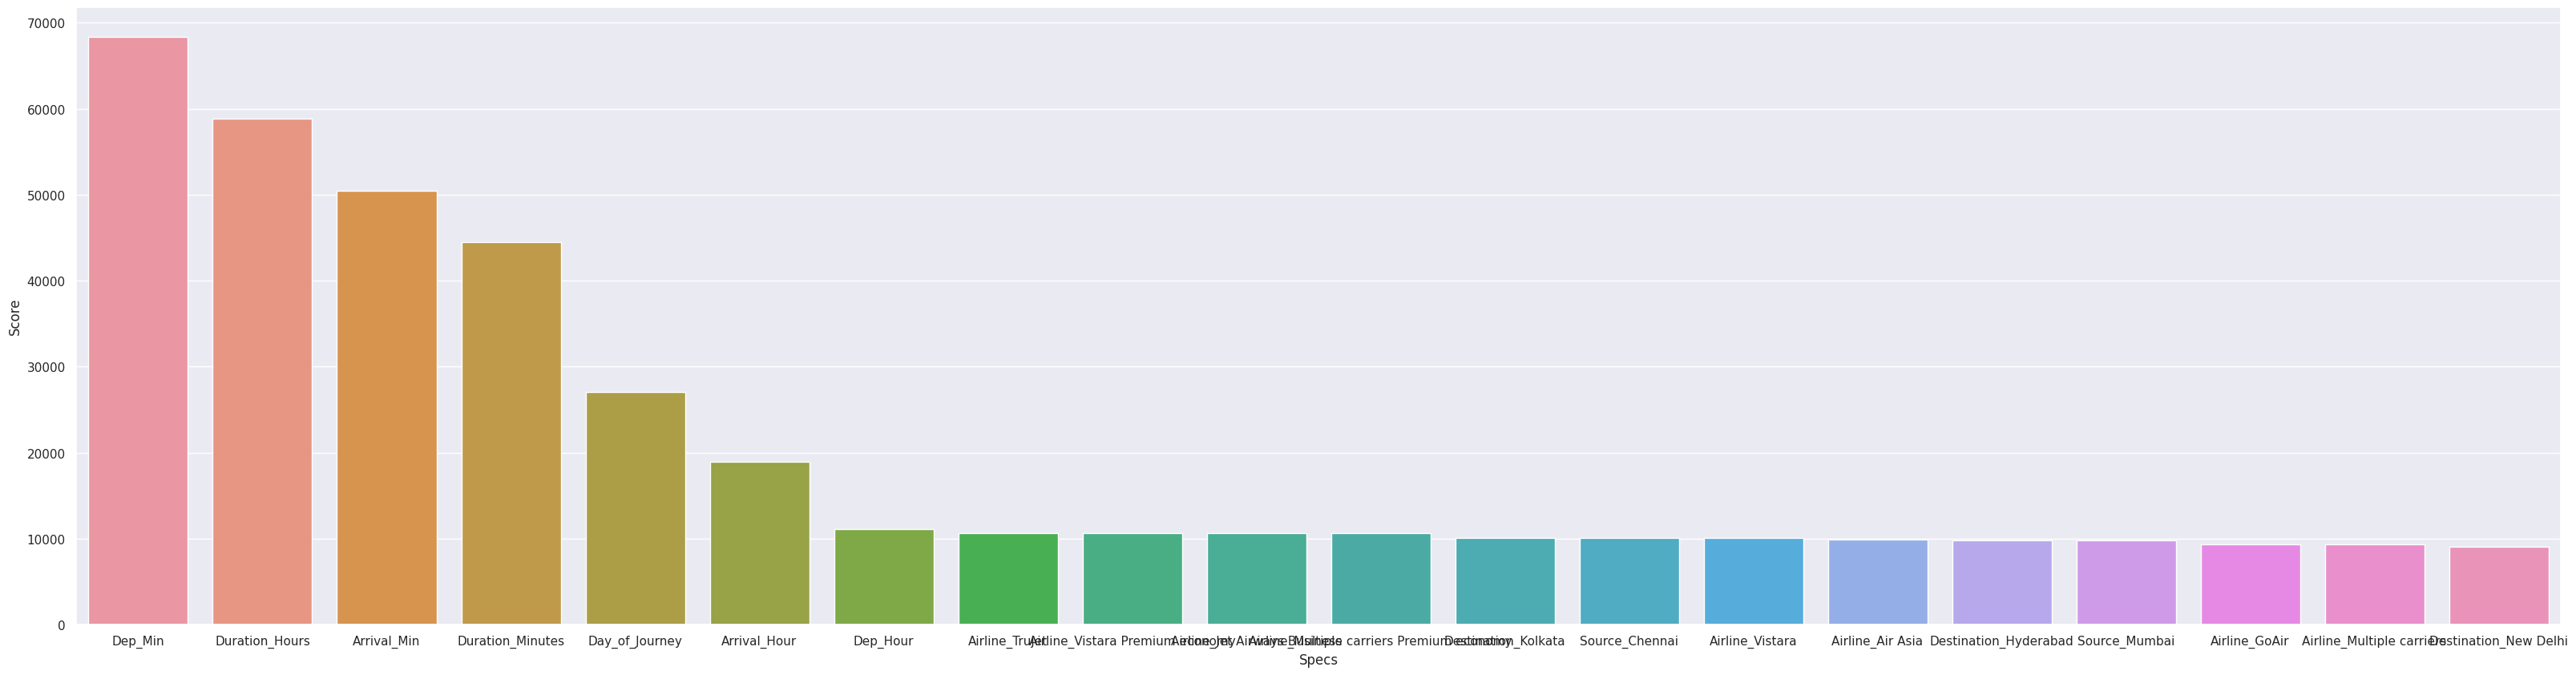

In [46]:
sns.set(rc = {'figure.figsize':(40,10)})
sns.barplot(x=featureScores.nlargest(20,'Score').Specs, y=featureScores.nlargest(20,'Score').Score)

> ### **2. Feature Importance**

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.
Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

[2.30078873e-03 1.00234014e-02 1.99485151e-03 1.71627634e-02
 1.38056313e-01 6.68947067e-02 1.72204488e-02 7.84363071e-04
 3.18045978e-03 9.11576489e-05 5.06850331e-03 1.38921404e-04
 2.88201864e-02 2.10503675e-02 1.05917131e-01 2.50448646e-02
 2.19742207e-02 2.56284258e-03 1.02407936e-02 1.34776230e-02
 7.53600294e-03 5.72087081e-04 1.61304924e-02 1.38154306e-01
 1.80818356e-02 8.66151597e-02 7.99004024e-03 4.05620670e-04
 7.09533142e-03 2.27932908e-03 7.49654432e-03 2.15638542e-01
 0.00000000e+00]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

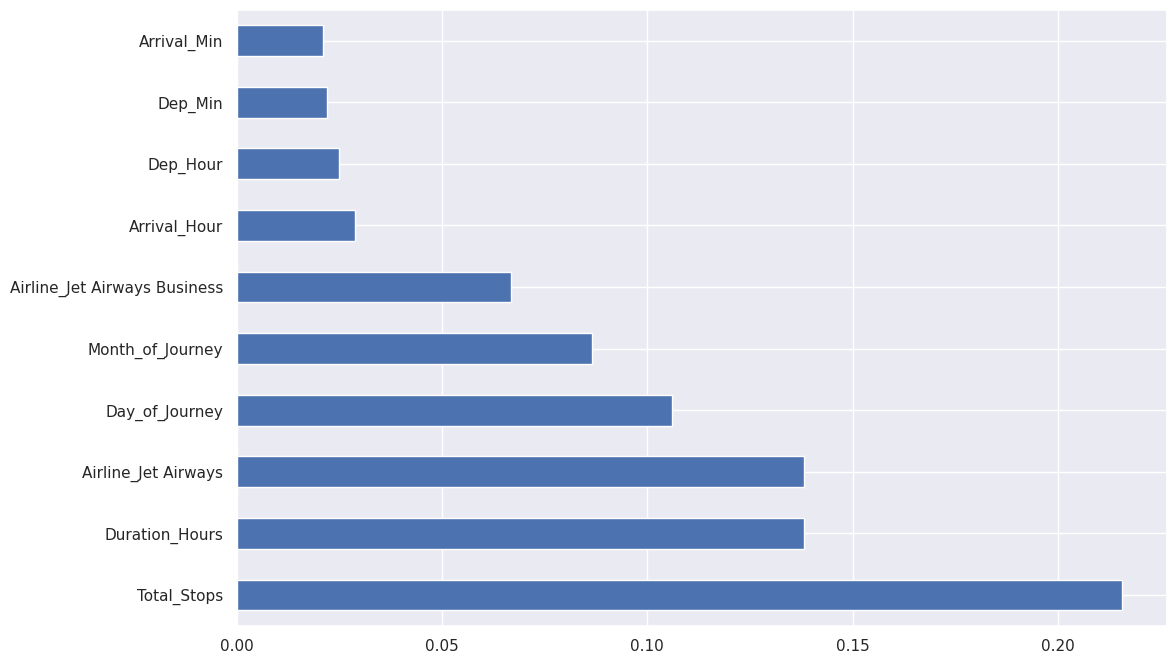

In [47]:
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

> ### **3.Correlation Matrix with Heatmap**
Correlation states how the features are related to each other or the target variable.
Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)
Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

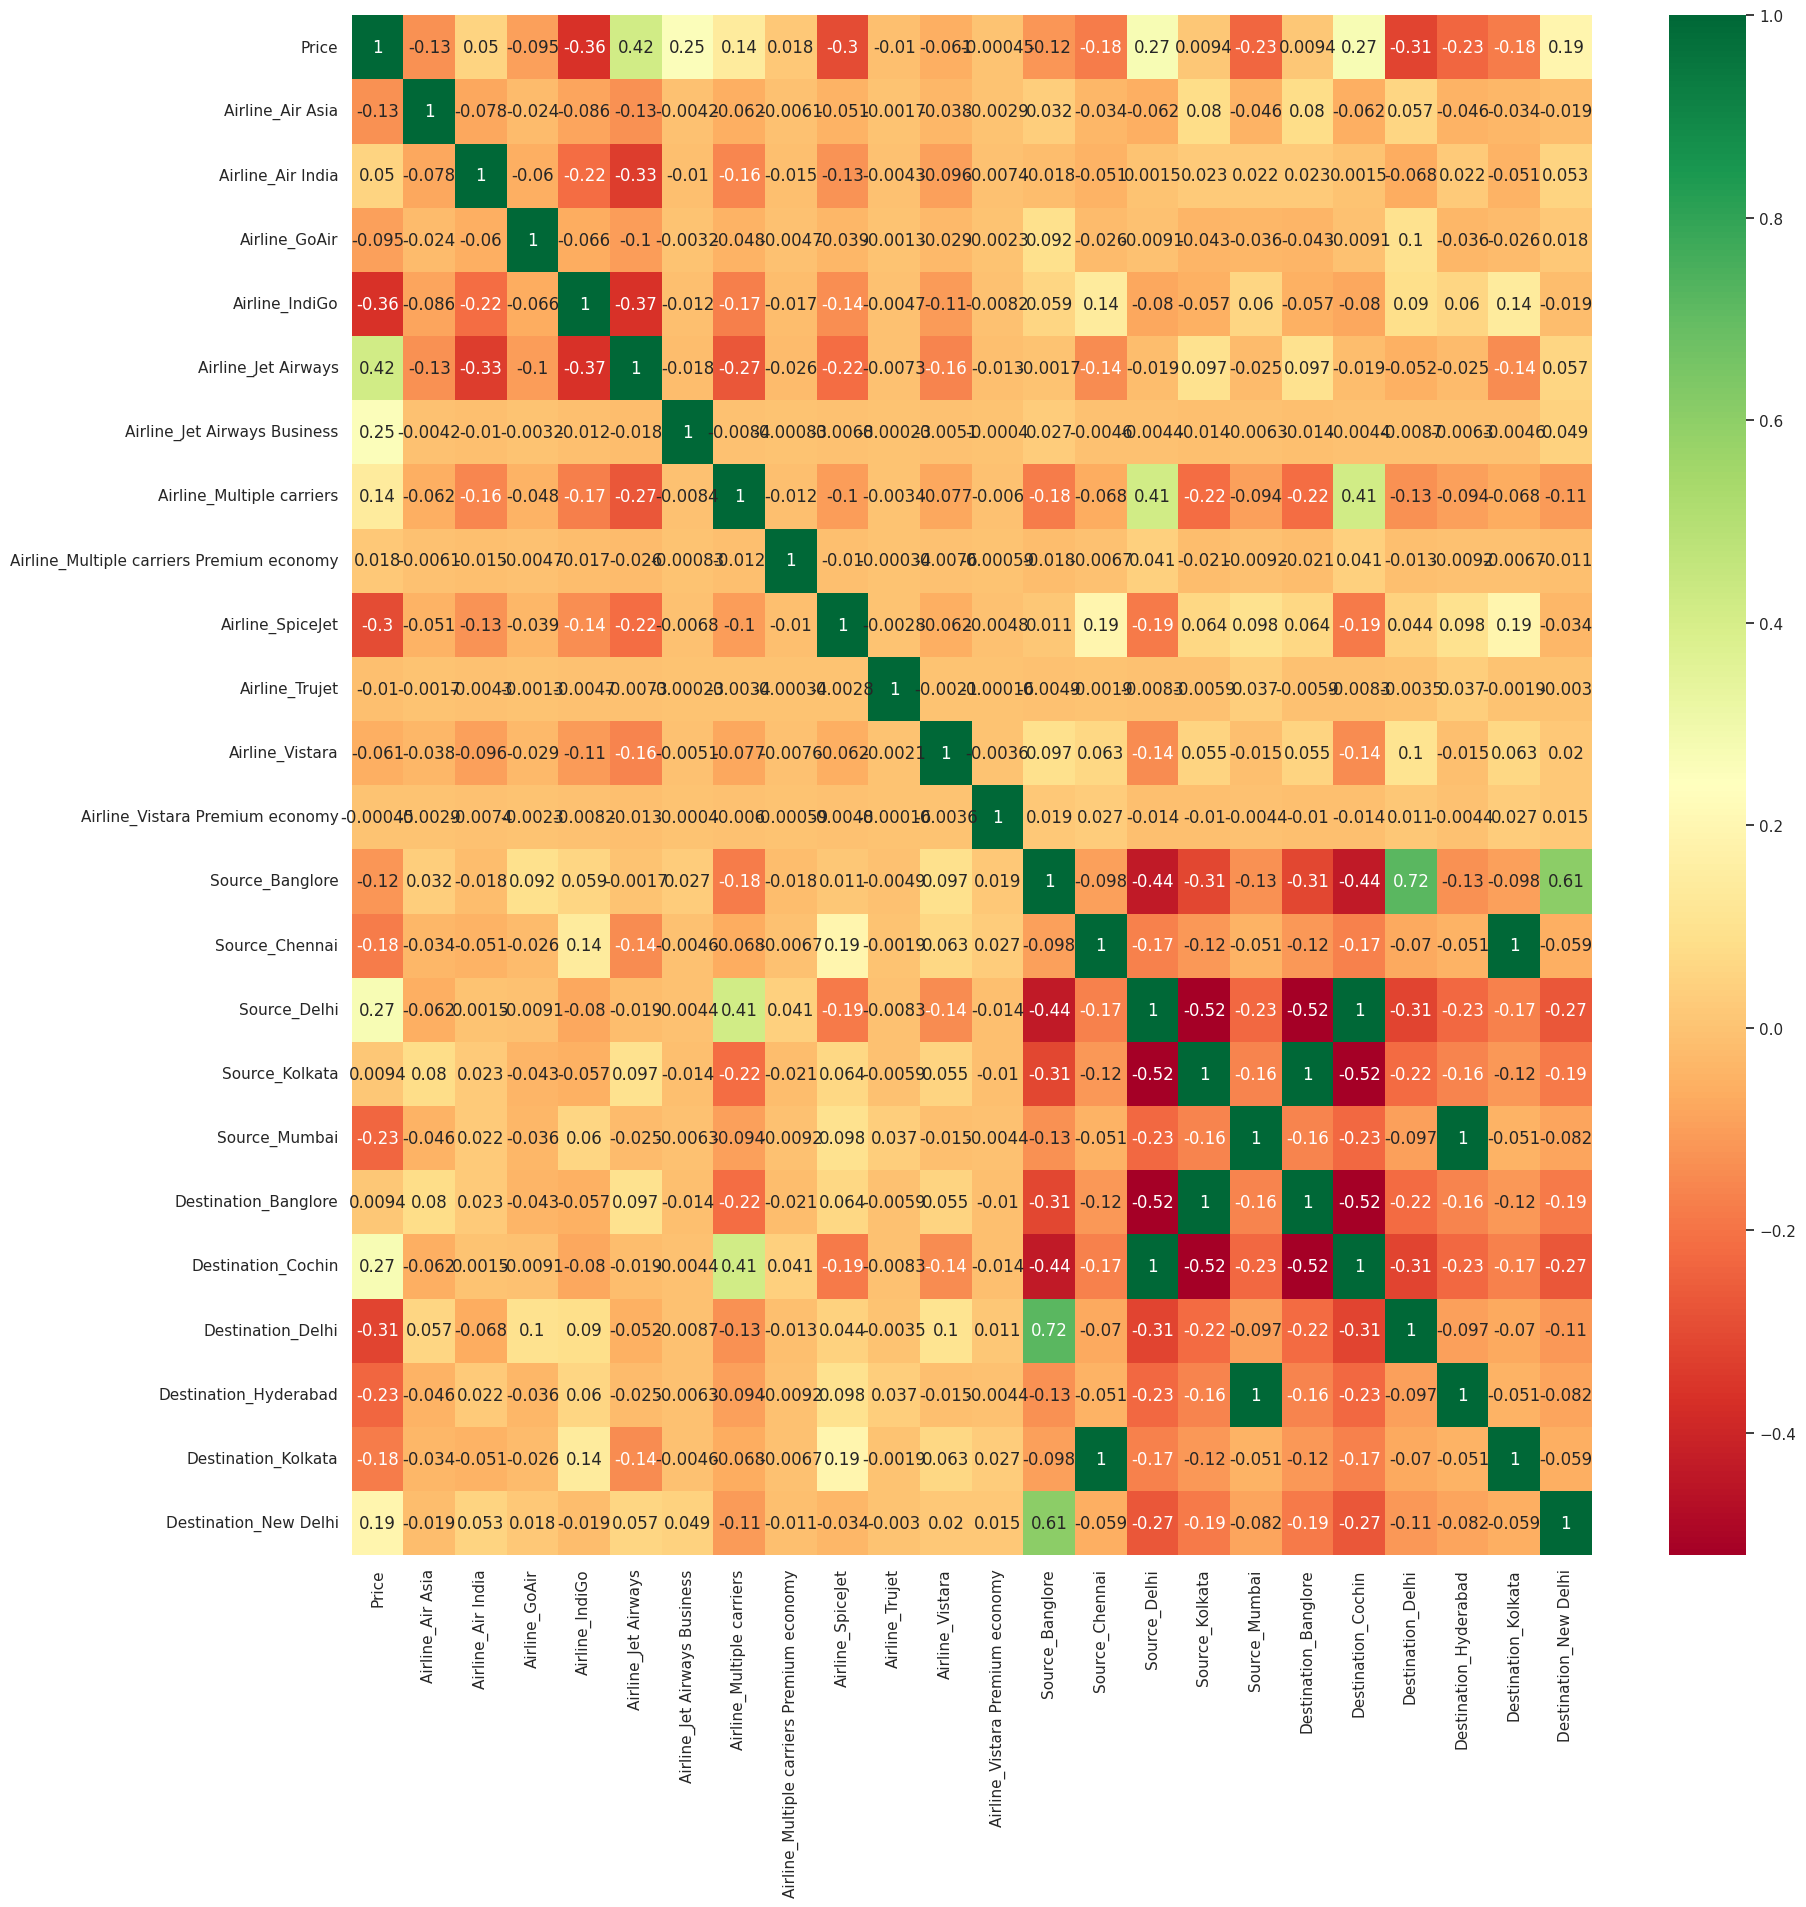

In [48]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Here we can drop one of the independent features from the pairs as both do the same task

> # **8. Data Modelling**

> ### **Regression methods**

In [49]:
#Converting object datatype to inetger otherwise we will get errpr for XGBRegressor
X = X.astype(str).astype(int)

In [50]:
X.columns

Index(['Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Arrival_Hour', 'Arrival_Min', 'Day_of_Journey', 'Dep_Hour', 'Dep_Min',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Duration_Hours', 'Duration_Minutes', 'Month_of_Journey',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Total_Stops', 'Year_of_Journey'],
      dtype='object')

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

[Reference](https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/)

In [52]:
# H
regg_models = [LinearRegression(), Lasso(), Ridge(), SVR(),
               RandomForestRegressor(), DecisionTreeRegressor(), xgb.XGBRegressor()]

> ### **Models evaluation**

[Reference](https://towardsdatascience.com/7-of-the-most-commonly-used-regression-algorithms-and-how-to-choose-the-right-one-fc3c8890f9e3)

**Metrics for Regression**
1. Mean Squared Error
2. Root Mean Squared Error
3. Mean Absolute Error

We know that: 

- Lower RMSE shows better fit 

- MAE of 0 means that your model is a perfect predictor of the outputs 

- Higher R square – is a better fit  

- The lower the value of MSE the better and 0 means the model is perfect 



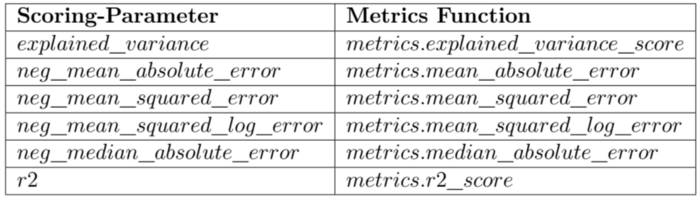

Functions ending with _score return a value that should be maximized if possible. Functions ending with _error or _loss return a value to minimize.

In [53]:
# X_train, X_test, y_train, y_test
#Making list to append scores in the Metrics for Regression
R2_score = []
Score_Train=[]
Score_Test=[]
RMSE = []
MAE=[]
Error=[]
MSE=[]
mean=[]
std=[]
    
#Making ditonary to plot bar graph
# R2_score_df=()
R2_score_dict = {}
RMSE_score_dict = {}
MAE_score_dict = {}
MSE_score_dict={}
Score_Train__dict={}
Score_Test__dict={}
Cross_Valication_score_dict={}

for i in regg_models:    
    train_model = i.fit(X_train, y_train)
    y_pred = train_model.predict(X_test)
    # score = train_model.score(X_test, y_test)
    # r2_score.append(score)
    #R2Score
    r2score=metrics.r2_score(y_test,y_pred) # (coefficient of determination) regression score function
    R2_score.append(r2score)
    #Score training dataset
    scoretrain=train_model.score(X_train,y_train)
    Score_Train.append(scoretrain)
    #Score training dataset
    scoretest=train_model.score(X_test,y_test)
    Score_Test.append(scoretest)
    
    #Normaized RMSE
    rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))/(max(y)-min(y))
    RMSE.append(rmse)   
    #MSE
    mse = metrics.mean_squared_error(y_test, y_pred)
    MSE.append(mse)   
    #MAE
    mae=metrics.mean_absolute_error(y_test,y_pred)
    MAE.append(mae)
    #Cross validation score
    cvs=cross_val_score(i,X,y,cv=5,scoring=make_scorer(r2_score))
    mean.append(np.mean(cvs))
    std.append(np.std(cvs))
    #Error
    # errr = [((y_pred[i]-y_test[i])/(y_test[i])) for i in range(0,len(y_test))]
    # errr = [((y_prediction[i]-actual[i])/(actual[i])) for i in range(0,len(y_test))]
    # Error.append(errr)    



print("                                         Training Data \n","="*100)
print("           r2_score \n")
for i in range(len(regg_models)):
    print(regg_models[i].__class__.__name__ ,':',R2_score[i])
    R2_score_dict.update({regg_models[i].__class__.__name__: R2_score[i]})

print('-'*60,'\n')

print("            Score Train \n")
for i in range(len(regg_models)):
    print(regg_models[i].__class__.__name__ ,':',Score_Train[i])
    Score_Train__dict.update({regg_models[i].__class__.__name__:Score_Train[i]})

print('-'*60,'\n')

print("            Score Test \n")
for i in range(len(regg_models)):
    print(regg_models[i].__class__.__name__ ,':',Score_Test[i])
    Score_Test__dict.update({regg_models[i].__class__.__name__:Score_Test[i]})
    
print('-'*60,'\n')

print("            Normalized RMSE \n")
for i in range(len(regg_models)):
    print(regg_models[i].__class__.__name__ ,':',RMSE[i])
    RMSE_score_dict.update({regg_models[i].__class__.__name__:RMSE[i]})

print('-'*60,'\n')

print("            MSE \n")
for i in range(len(regg_models)):
    print(regg_models[i].__class__.__name__ ,':',MSE[i])
    MSE_score_dict.update({regg_models[i].__class__.__name__:MSE[i]})

print('-'*60,'\n')


print("            MAE \n")
for i in range(len(regg_models)):
    print(regg_models[i].__class__.__name__ ,':',MAE[i])
    MAE_score_dict.update({regg_models[i].__class__.__name__ :MAE[i]})


print('-'*60,'\n')


print('________________Cross Validation Score________________ \n')
for i in range(len(regg_models)):
    print(regg_models[i].__class__.__name__ ,':',mean[i])
    Cross_Valication_score_dict.update({regg_models[i].__class__.__name__ :MAE[i]})

# print('-'*60,'\n')

# print("            Error \n")
# for i in range(len(regg_models)):
#     print(regg_models[i].__class__.__name__ ,':',Error[i])



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                                         Training Data 
           r2_score 

LinearRegression : 0.6114560904320471
Lasso : 0.6111636506499498
Ridge : 0.610724473370811
SVR : -0.027876951119440774
RandomForestRegressor : 0.7838702070185777
DecisionTreeRegressor : 0.6883402244495069
XGBRegressor : 0.8341051883853803
------------------------------------------------------------ 

            Score Train 

LinearRegression : 0.6192937329692871
Lasso : 0.6190752900684331
Ridge : 0.6178189172860229
SVR : -0.02347001770090107
RandomForestRegressor : 0.9536473186528672
DecisionTreeRegressor : 0.9697622209007399
XGBRegressor : 0.9366063802043948
------------------------------------------------------------ 

            Score Test 

LinearRegression : 0.6114560904320471
Lasso : 0.6111636506499498
Ridge : 0.610724473370811
SVR : -0.027876951119440774
RandomForestRegressor : 0.7838702070185777
DecisionTreeRegressor : 0.6883402244495069
XGBRegressor : 0.8341051883853803
----------------------------

> #### **Coefficient of determination (R²)**

The so-called coefficient of determination (R²) can be understood as a standardized version of the MSE. This allows an easier interpretation of the performance of the model. The best possible performance is described with the value 1.0. The R² -score can also become negative if the model shows arbitrary deviations from the truth value. A constant model, which makes the prediction of the values without the consideration of the input characteristics, would receive a R² -score of 0.0.

<IPython.core.display.Javascript object>

<BarContainer object of 7 artists>

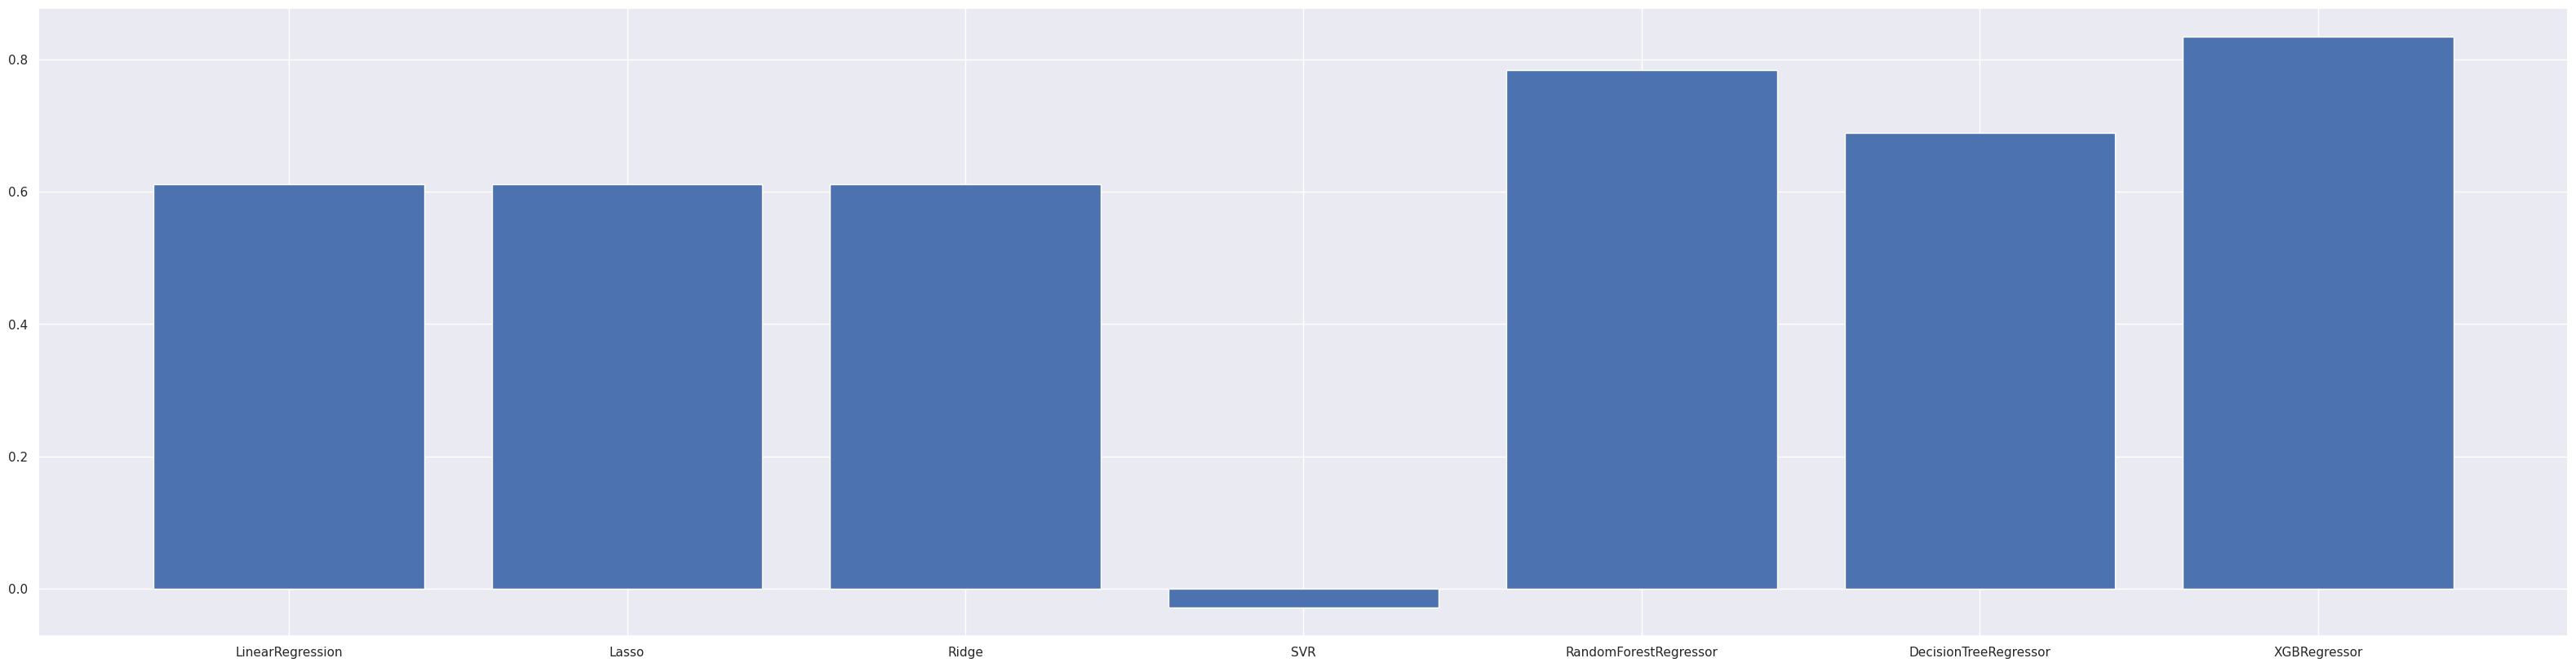

In [54]:
#comparing R2_score for all models and finding out which model performs the best
keys = R2_score_dict.keys()
values = R2_score_dict.values()
plt.bar(keys, values)

**Higher R square – is a better fit**

Winner is: "Random forest"

> #### **Train Score and Test Score**

<IPython.core.display.Javascript object>

<BarContainer object of 7 artists>

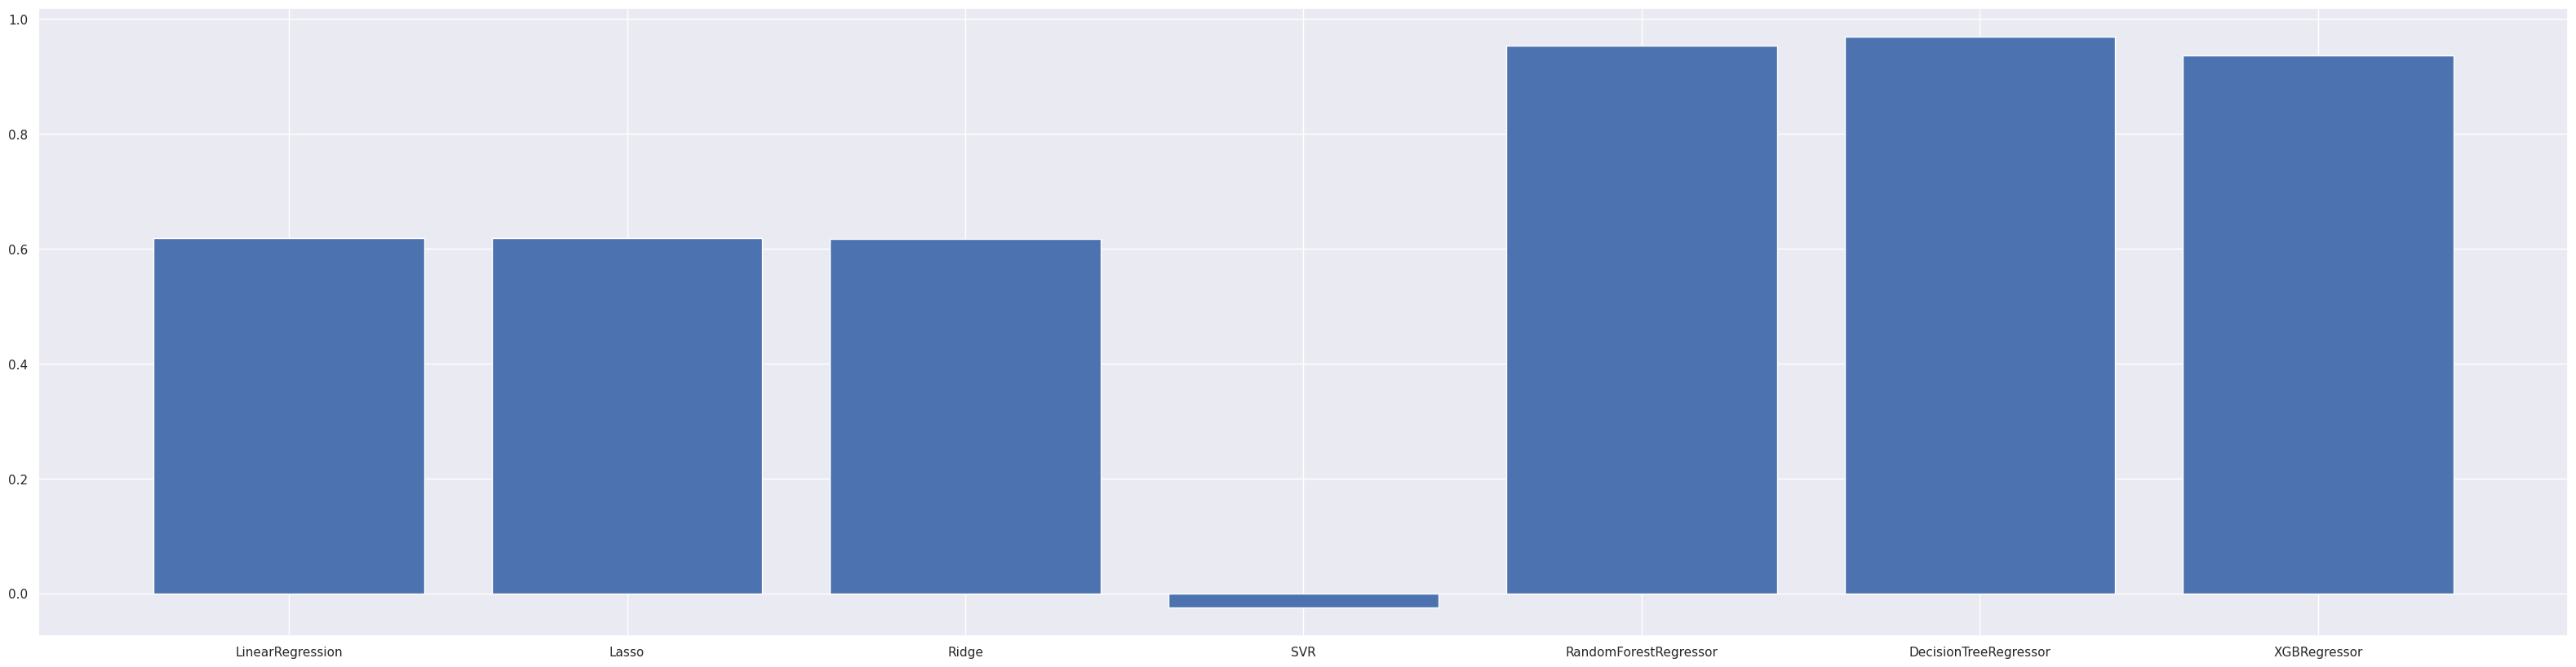

In [55]:
#comparing Train Score for all models and finding out which model performs the best
keys = Score_Train__dict.keys()
values = Score_Train__dict.values()
plt.bar(keys, values)

<IPython.core.display.Javascript object>

<BarContainer object of 7 artists>

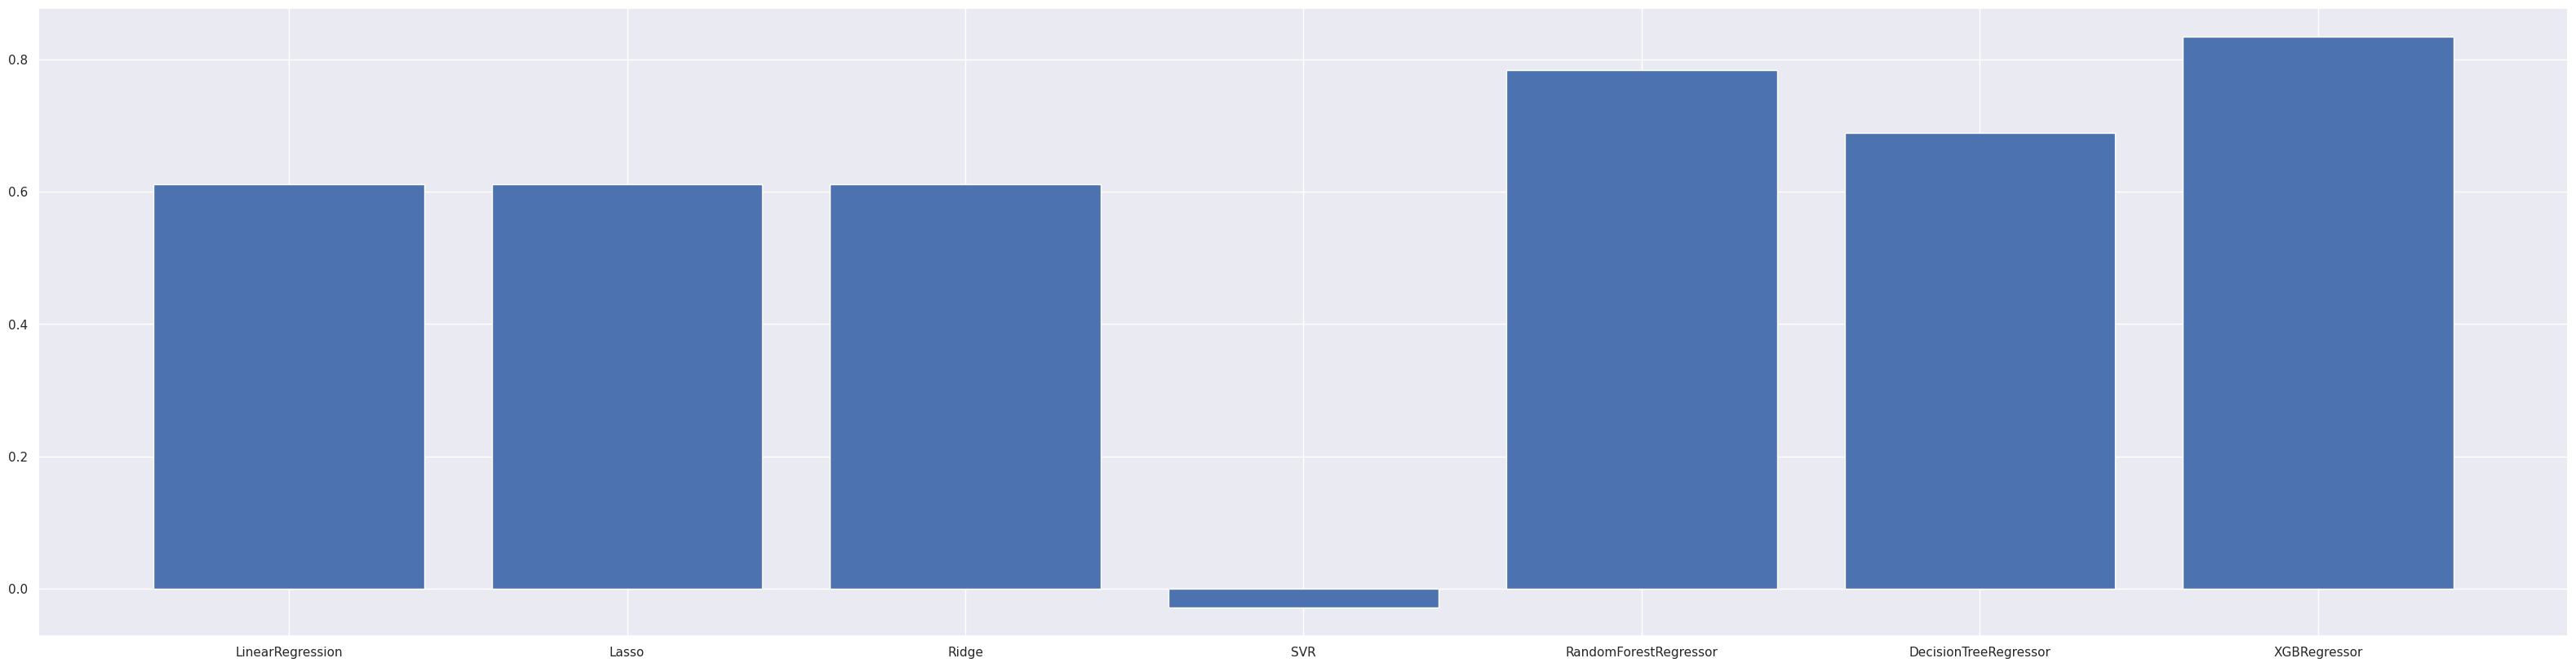

In [56]:
#comparing Test Score for all models and finding out which model performs the best
keys = Score_Test__dict.keys()
values = Score_Test__dict.values()
plt.bar(keys, values)

> #### **Normalized RMSE**

One question people often have is: What is a good RMSE value?

The short answer: It depends.

The lower the RMSE, the better a given model is able to “fit” a dataset. However, the range of the dataset you’re working with is important in determining whether or not a given RMSE value is “low” or not.

There is no universally “good” RMSE value. It all depends on the range of values in the dataset you’re working with.

Normalizing the RMSE Value
One way to gain a better understanding of whether a certain RMSE value is “good” is to normalize it using the following formula:
```
Normalized RMSE = RMSE / (max value – min value)
```

This produces a value between 0 and 1, where values closer to 0 represent better fitting models.

[Reference](https://www.statology.org/what-is-a-good-rmse/)

<IPython.core.display.Javascript object>

<BarContainer object of 7 artists>

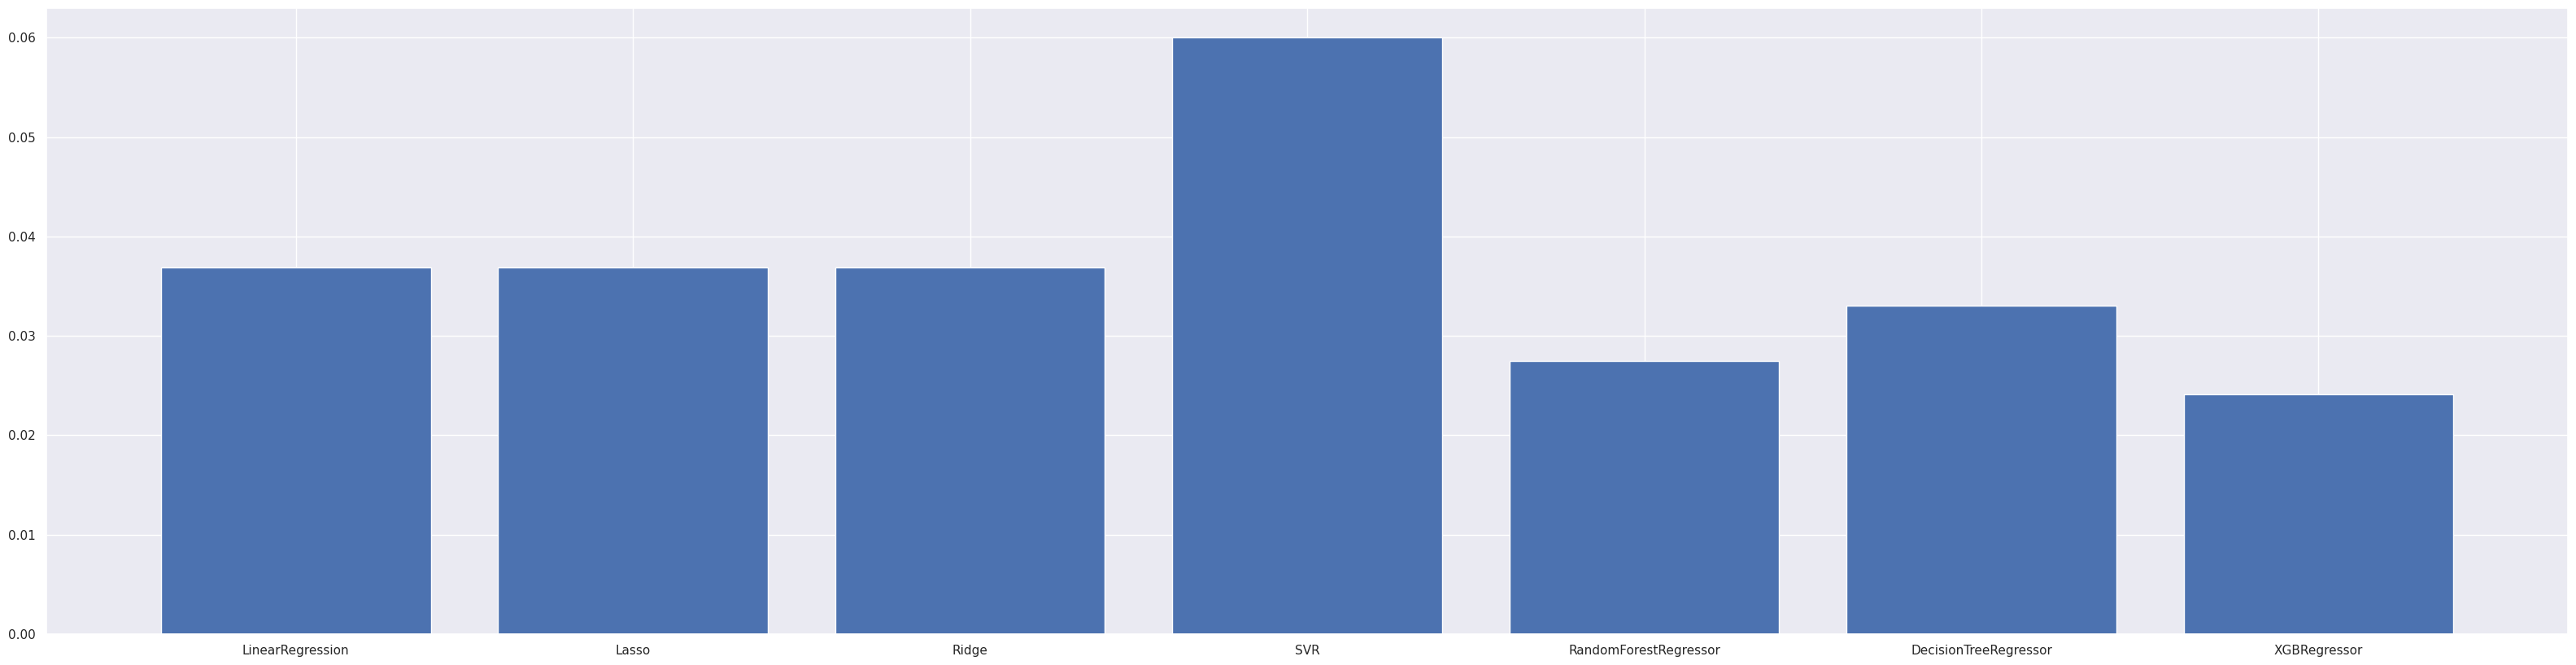

In [57]:
#comparing Normalized RMSE for all models and finding out which model performs the best
keys = RMSE_score_dict.keys()
values = RMSE_score_dict.values()
plt.bar(keys, values)

**Lower Normalized RMSE shows better fit (The Normalized RMSE should be closest to zero)**

Winner: "Random forest"

> #### **Mean Absolute Error (MAE)**

<IPython.core.display.Javascript object>

<BarContainer object of 7 artists>

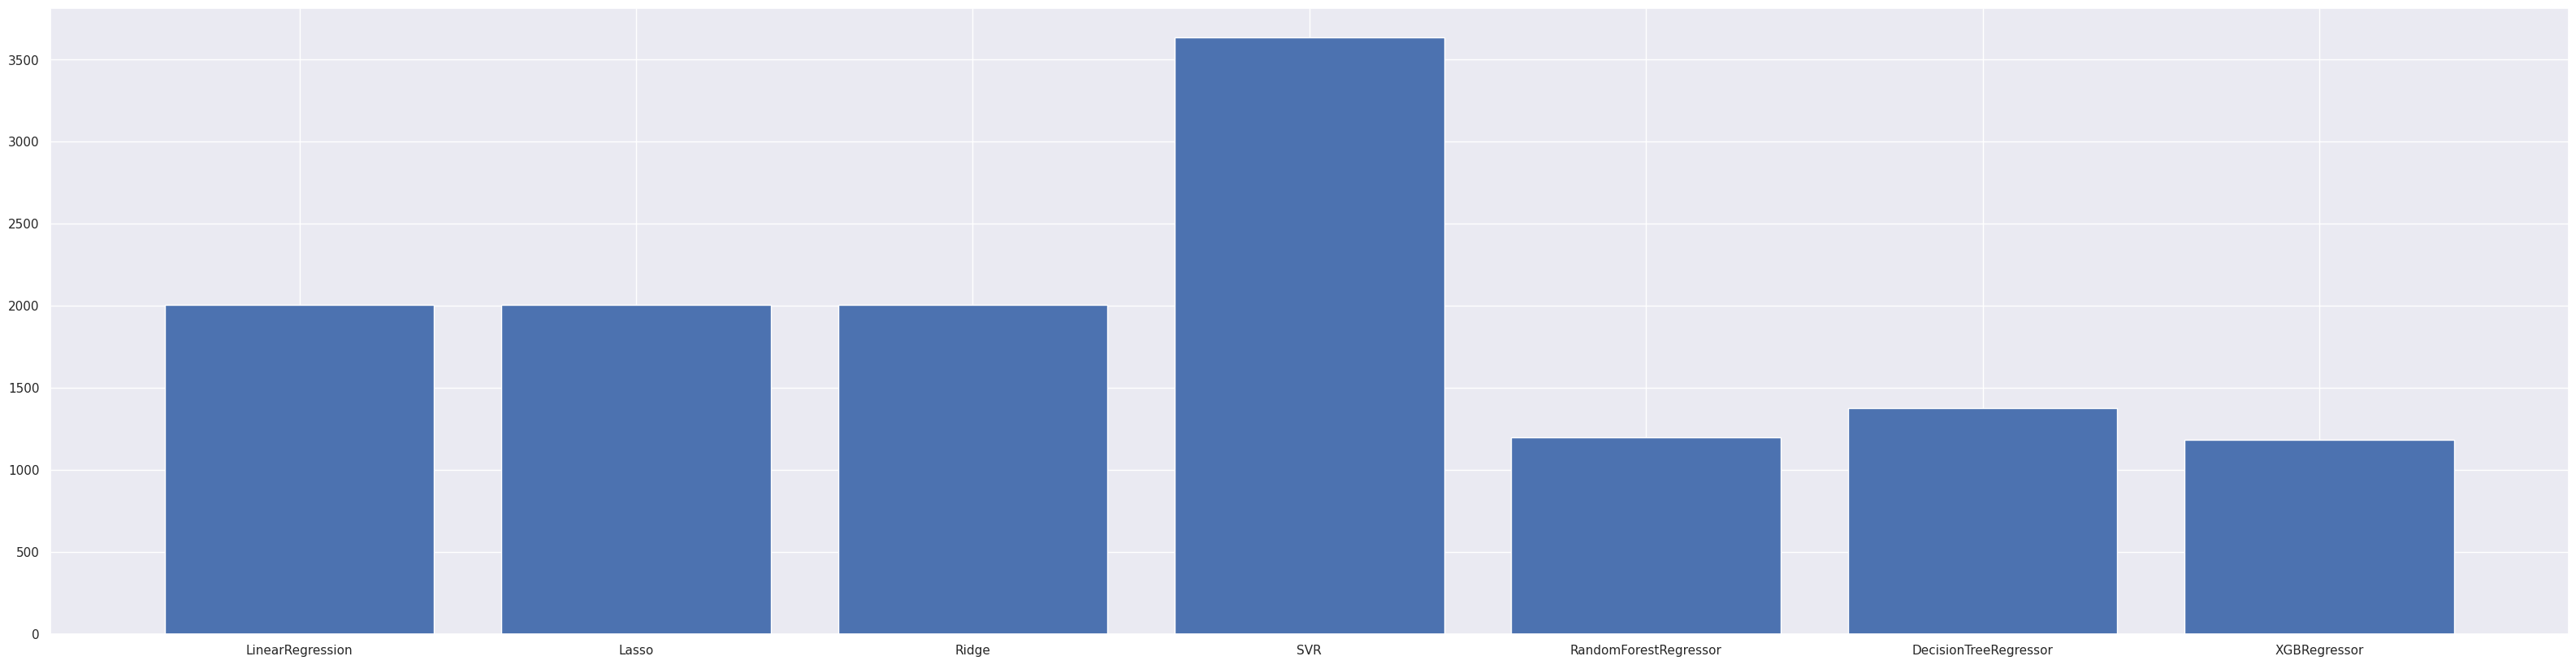

In [58]:
#comparing MAE for all models and finding out which model performs the best
keys = MAE_score_dict.keys()
values = MAE_score_dict.values()
plt.bar(keys, values)

**MAE of 0 means that your model is a perfect predictor of the outputs**

Winner: "Random forest"

> #### **Squared Error (MSE)**

<IPython.core.display.Javascript object>

<BarContainer object of 7 artists>

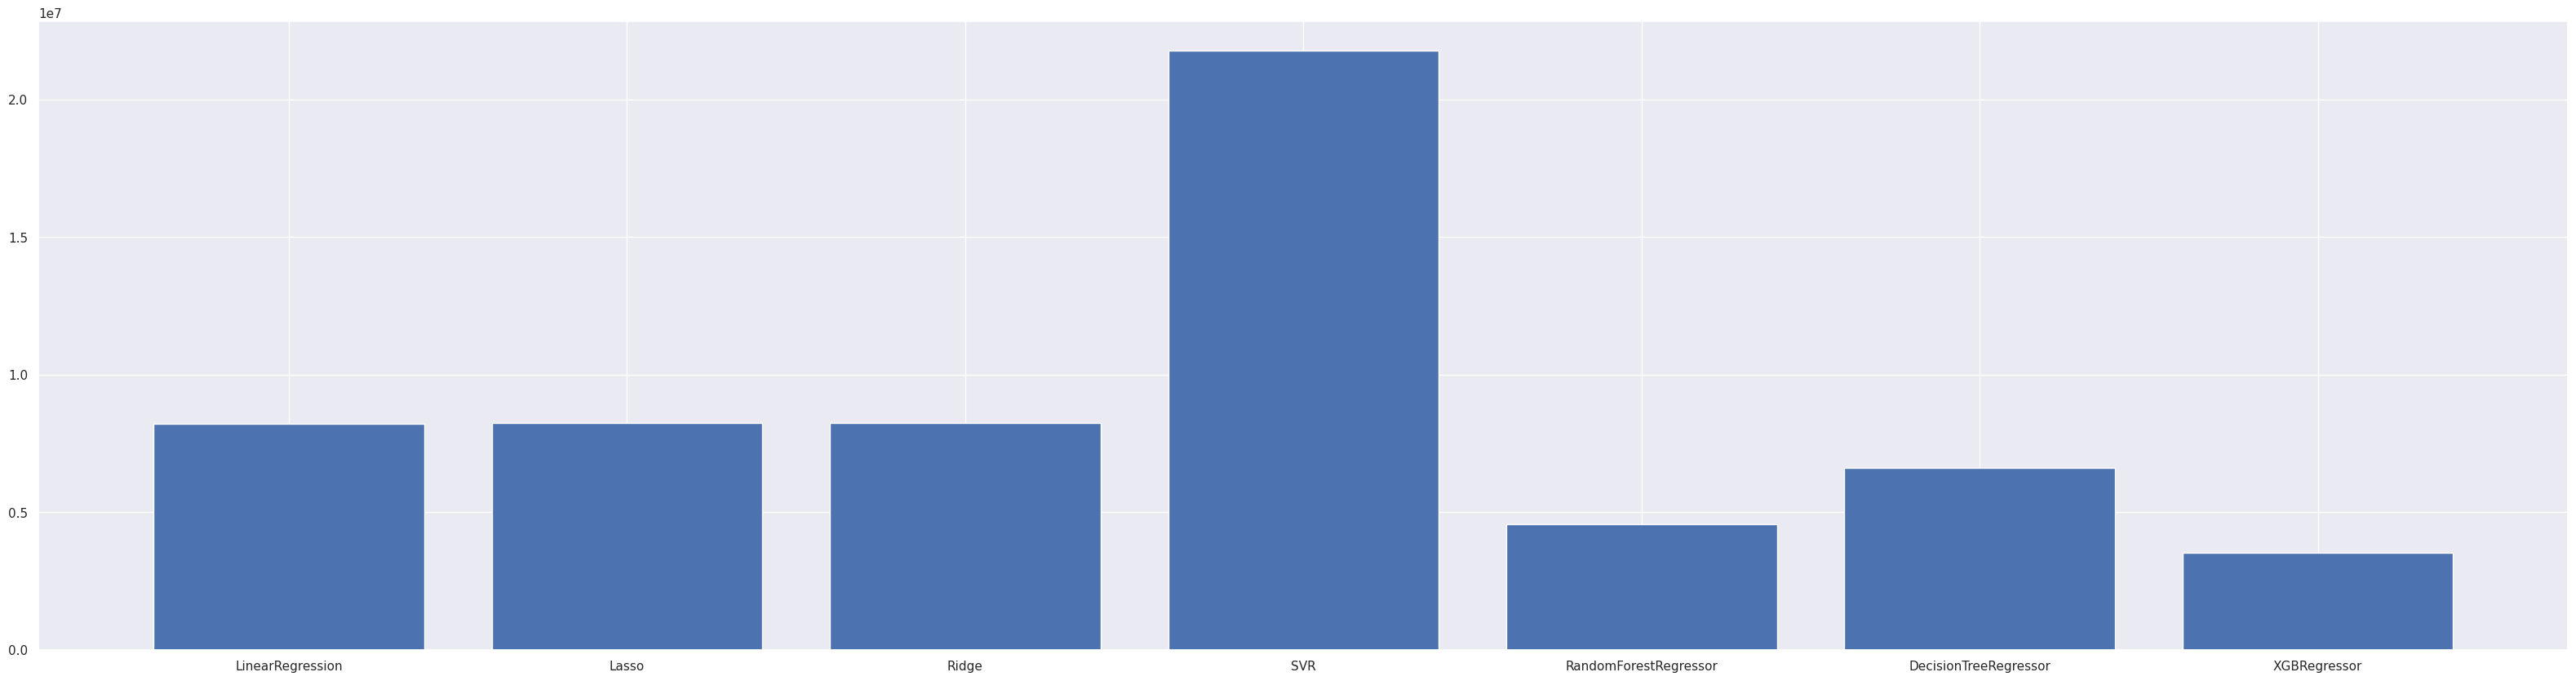

In [59]:
#comparing MSE for all models and finding out which model performs the best
keys = MSE_score_dict.keys()
values = MSE_score_dict.values()
plt.bar(keys, values)

**The lower the value of MSE the better**

Winner: Random forest

> #### **Cross validation score**

Cross-validation is a statistical method for model selection. To evaluate a method, the entire dataset is divided into a training and a test dataset, whereby the training dataset usually comprises 80 to 90 % of the entire dataset. In order to achieve the best possible evaluation of the model, the aim is to have as large a test dataset as possible. Good model building is achieved by having as large a training dataset as possible.
Cross-validation is used to circumvent this dilemma. This method allows the entire dataset to be used for both training and testing. Compared to a fixed division into train and test data, cross-validation thus allows a more accurate estimate of model accuracy for future data or data not included in the dataset.

<IPython.core.display.Javascript object>

<BarContainer object of 7 artists>

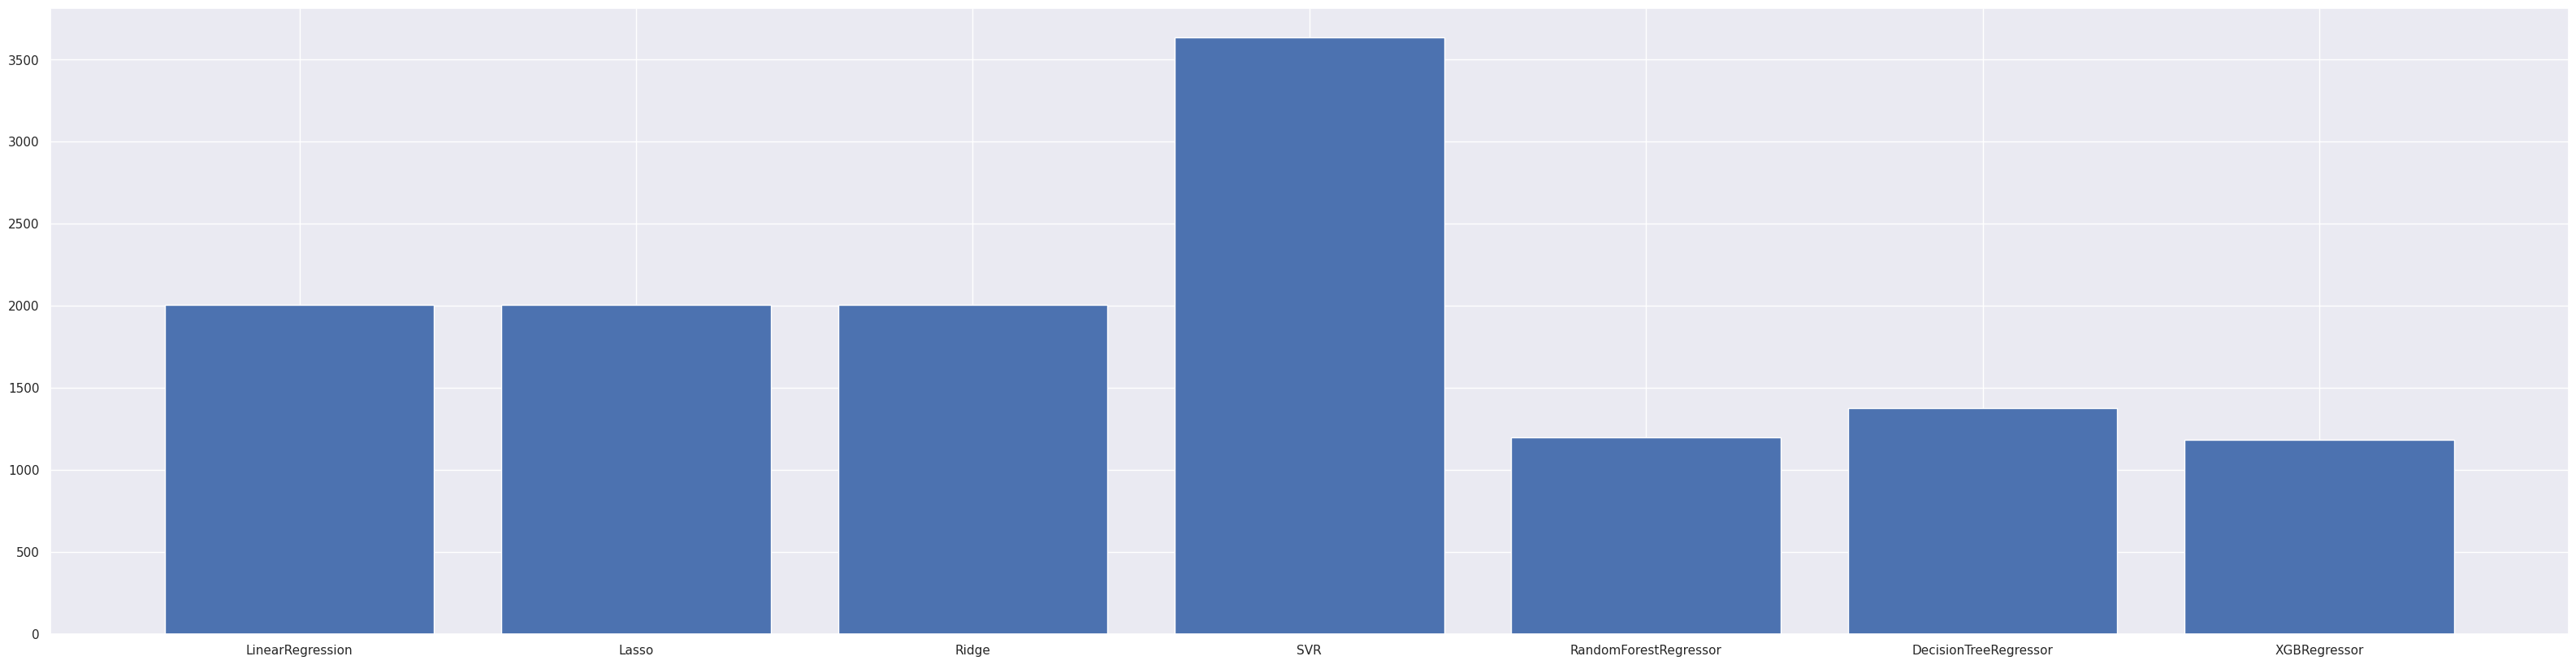

In [60]:
#comparing cross validation score for all models and finding out which model performs the best
keys = Cross_Valication_score_dict.keys()
values = Cross_Valication_score_dict.values()
plt.bar(keys, values)

In [ ]:
# # R2_score_dict
# bar_graphs = [R2_score_dict,RMSE_score_dict, MAE_score_dict ]

# keys=[]
# values=[]
# for i in range(len(bar_graphs)):
#   keys = bar_graphs[i].keys()
#   values = bar_graphs[i].values()
#   plt.bar(keys, values)
#   # ax = sns.barplot(x=keys, y=values, data=bar_graphs[i])

In [61]:
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)
y_pred = reg_rf.predict(X_test)
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 4634268.333529894


In [62]:
y_pred = reg_rf.predict(X_test)

In [63]:
print("Score train Random forest: ",reg_rf.score(X_train,y_train))
print("Score test Random forest: ",reg_rf.score(X_test,y_test))
print('R2_score regression score function:', metrics.r2_score(y_test,y_pred)) # (coefficient of determination) regression score function

Score train Random forest:  0.9534545386331083
Score test Random forest:  0.7810302510721457
R2_score regression score function: 0.7810302510721457


The takeaway is r2_score and score for regressors are the same - they are just different ways of calculating the coefficient of determination.

[Difference between R2score vs Score](https://www.kaggle.com/getting-started/27261)

<IPython.core.display.Javascript object>

<ipython-input-64-75adb1dd5983>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


<IPython.core.display.Javascript object>

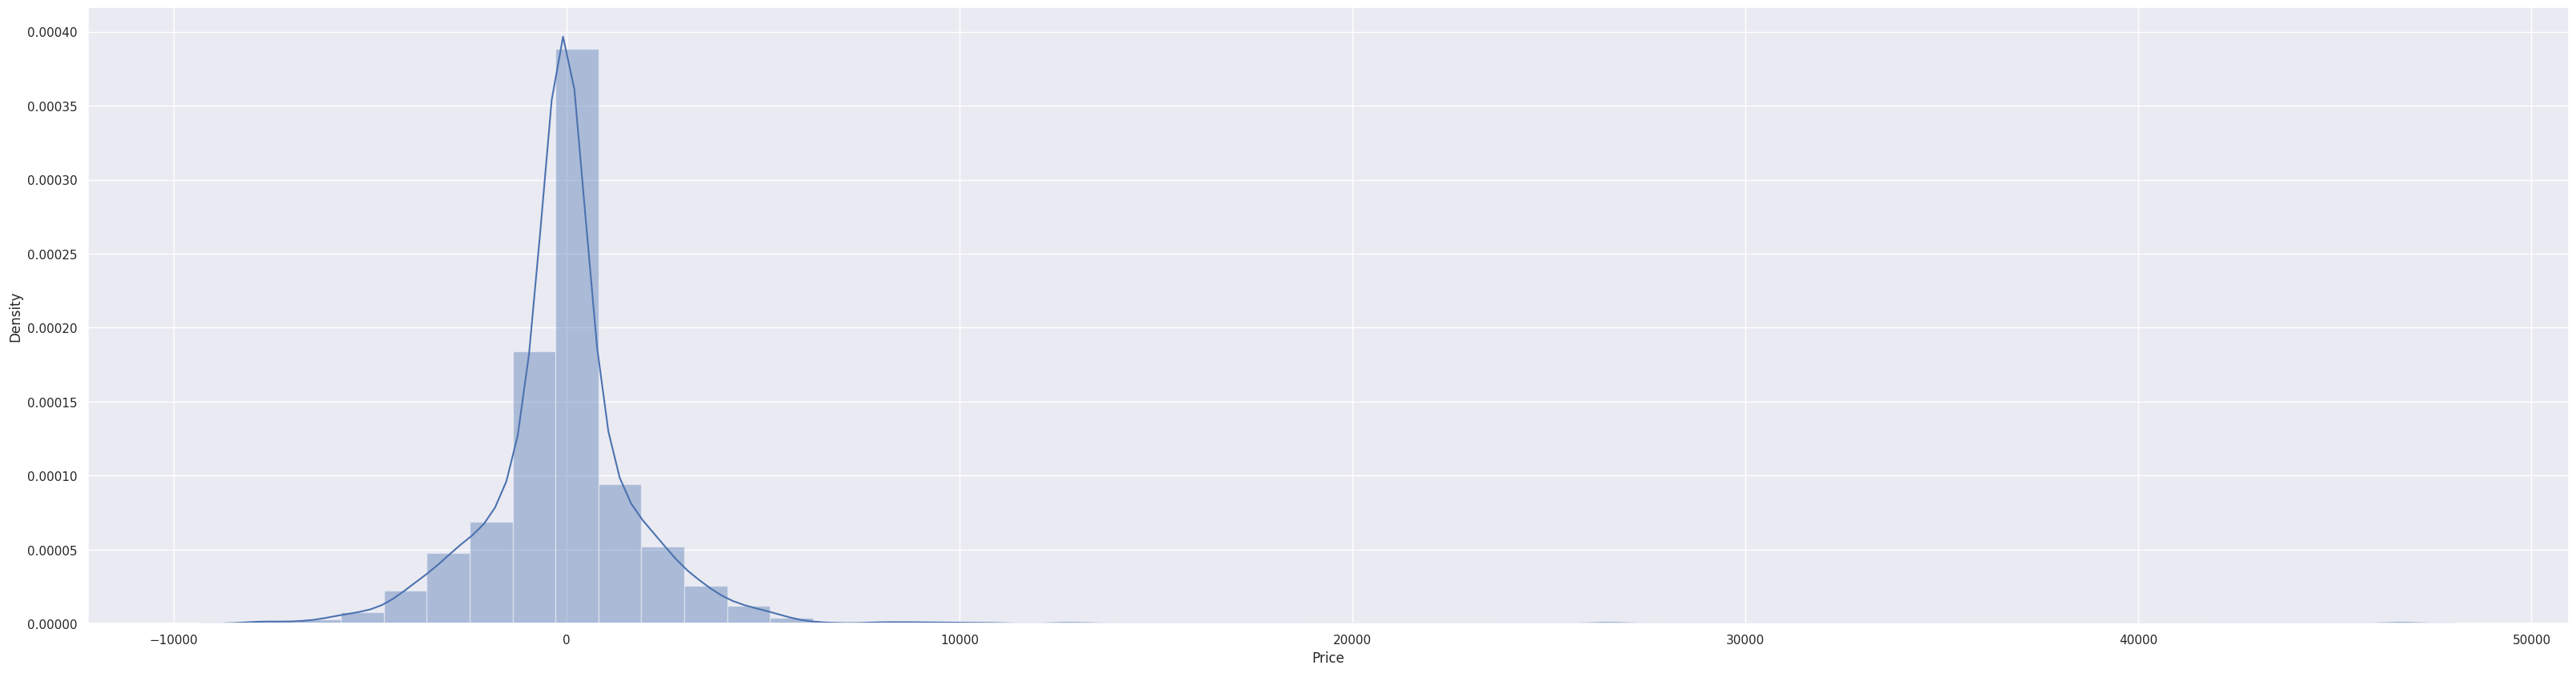

In [64]:
sns.distplot(y_test-y_pred)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

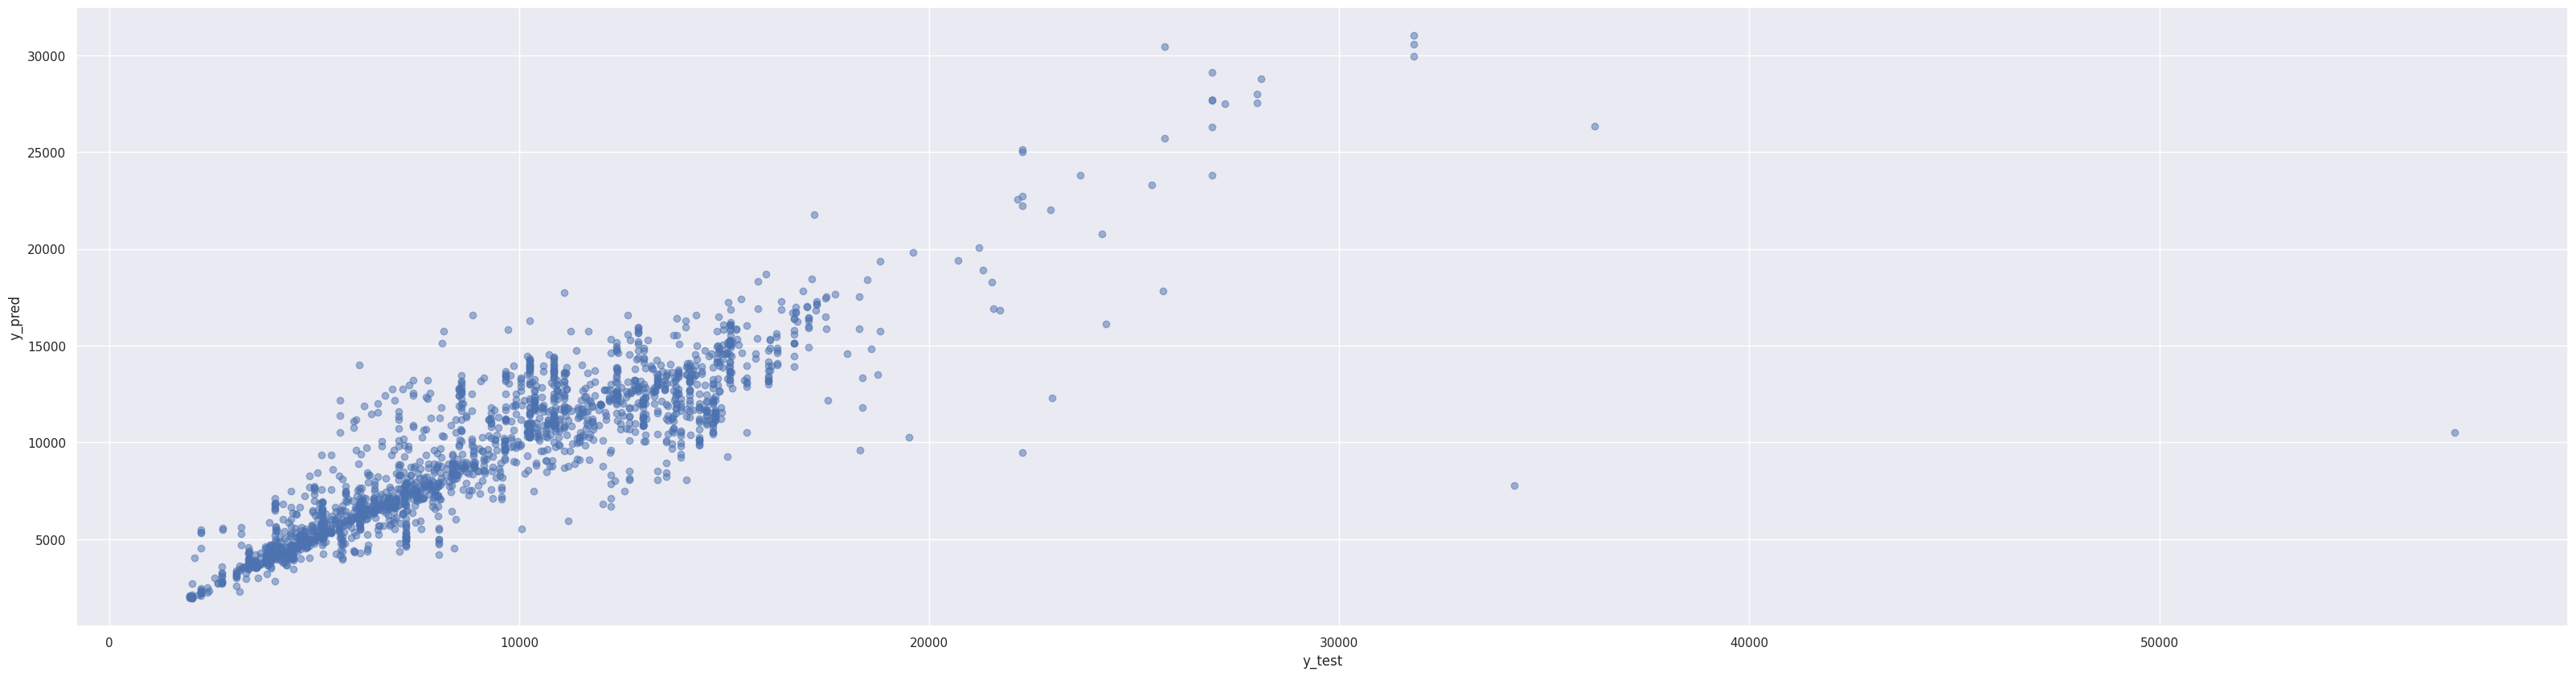

In [65]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

> ### **Hyper Parameter Tuning (GridSearchCV Vs RandomizedSearchCV)**

[Reference](https://medium.com/analytics-vidhya/hyper-parameter-tuning-gridsearchcv-vs-randomizedsearchcv-499862e3ca5)

In [ ]:
# # Run GridSearch to tune the hyper-parameter
# from sklearn.model_selection import GridSearchCV
# rfr=RandomForestRegressor()
# k_fold_cv = 5 # Stratified 5-fold cross validation
# grid_params = {
#     "n_estimators" : [10,50,100],
#     "max_features" : ["auto", "log2", "sqrt"],
#     "bootstrap" : [True, False]
#  }
# grid = GridSearchCV(rfr, param_grid=grid_params, cv=k_fold_cv, 
#  n_jobs = 1, verbose = 0, return_train_score=True)
# grid.fit(X_train, y_train)
# print('Best hyper parameter:', grid.best_params_)

In [ ]:
# prediction_grid = grid.predict(X_test)

In [ ]:
# #R2Score
# print("R2score:",metrics.r2_score(y_test,prediction_grid)) # (coefficient of determination) regression score function
# #Score training dataset
# print("scoretrain:",grid.score(X_train,y_train))
# #Score training dataset
# print("scoretest",grid.score(X_test,y_test))
# #Normaized RMSE
# rmse = np.sqrt(metrics.mean_squared_error(y_test,prediction_grid))/(max(y)-min(y))
# print("Normaized RMSE:", rmse)
# #MSE
# print("MSE", metrics.mean_squared_error(y_test, prediction_grid))
# #MAE
# print("MAE:",metrics.mean_absolute_error(y_test,prediction_grid))
# #Cross validation score
# # print("Cross validation score:",cross_val_score(i,X,y,cv=5,scoring=make_scorer(r2_score)))

In [ ]:
# # Run RandomizedSearchCV to tune the hyper-parameter
# from sklearn.model_selection import RandomizedSearchCV
# rfr=RandomForestRegressor()
# k_fold_cv = 5 # Stratified 5-fold cross validation
# params = {
#     "n_estimators" : [10,50,100],
#     "max_features" : ["auto", "log2", "sqrt"],
#     "bootstrap" : [True, False]
#  }
# random = RandomizedSearchCV(rfr, param_distributions=params, cv=k_fold_cv,
#  n_iter = 5, scoring='neg_mean_absolute_error',verbose=2, random_state=42,
#  n_jobs=-1, return_train_score=True)
# random.fit(X_train, y_train)
# print('Best hyper parameter:', random.best_params_)

In [ ]:
# prediction_random = random.predict(X_test)

In [ ]:
# #R2Score
# print("R2score:",metrics.r2_score(y_test,prediction_random)) # (coefficient of determination) regression score function
# #Score training dataset
# print("scoretrain:",random.score(X_train,y_train))
# #Score training dataset
# print("scoretest",random.score(X_test,y_test))
# #Normaized RMSE
# rmse = np.sqrt(metrics.mean_squared_error(y_test,prediction_random))/(max(y)-min(y))
# print("Normaized RMSE:", rmse)
# #MSE
# print("MSE", metrics.mean_squared_error(y_test, prediction_random))
# #MAE
# print("MAE:",metrics.mean_absolute_error(y_test,prediction_random))
# #Cross validation score
# # print("Cross validation score:",cross_val_score(i,X,y,cv=5,scoring=make_scorer(r2_score)))

In [66]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)          
rf_random.fit(X_train,y_train)
rf_random.best_params_
prediction_random = rf_random.predict(X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   5.5s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   4.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   4.5s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   5.5s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   5.7s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   9.3s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   7.8s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   9.1s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   8.5s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   8.4s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  13.7s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  13.3s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  13.4s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  13.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  13.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  11.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  10.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  11.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  11.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  11.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   3.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   3.7s
[CV] END max_depth=5, max_feat

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  15.3s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  15.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  15.4s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  15.2s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  15.5s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [ ]:
#R2Score
print("R2score:",metrics.r2_score(y_test,prediction_random)) # (coefficient of determination) regression score function
#Score training dataset
print("scoretrain:",rf_random.score(X_train,y_train))
#Score training dataset
print("scoretest",rf_random.score(X_test,y_test))
#Normaized RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_test,prediction_random))/(max(y)-min(y))
print("Normaized RMSE:", rmse)
#MSE
print("MSE", metrics.mean_squared_error(y_test, prediction_random))
#MAE
print("MAE:",metrics.mean_absolute_error(y_test,prediction_random))
#Cross validation score
# print("Cross validation score:",cross_val_score(i,X,y,cv=5,scoring=make_scorer(r2_score)))

R2score: 0.8021858987137342
scoretrain: -2119151.500176365
scoretest -4186530.9249573853


<IPython.core.display.Javascript object>

Normaized RMSE: 0.02631540129060509
MSE 4186530.9249573853
MAE: 1170.8336549301741


The results are slightly better while using GridSearchCV

> ### **Saving the model**

In [ ]:
import pickle
# open a file where we want to store the data & dumping information to that file
with open('/content/drive/MyDrive/Colab files/Flight fare prediction/flight_fare_random_forest-rf_random.pkl.pkl', 'wb') as handle:
    pickle.dump(rf_random, handle)

In [ ]:
# to load pickle
with open('/content/drive/MyDrive/Colab files/Flight fare prediction/flight_fare_random_forest-rf_random.pkl.pkl', 'rb') as handle:
    grid = pickle.load(handle)

In [ ]:
y_prediction = grid.predict(X_test)

In [ ]:
metrics.r2_score(y_test, y_prediction)

0.8021858987137342

In [ ]:
# import pickle
# to save pickle
# with open('/content/drive/MyDrive/Colab files/Gameofthroneskaggle/counts.pkl', 'wb') as handle:
#     pickle.dump(char_counts, handle)

# to load pickle
# with open('/content/drive/MyDrive/Colab files/Gameofthroneskaggle/counts.pkl', 'rb') as handle:
#     char_counts = pickle.load(handle)

> # **9- Conclusion**
---

- As per the data, the flight fare increases as the number of stops increases

> # **10- Reference**
---

- https://towardsdatascience.com/import-all-python-libraries-in-one-line-of-code-86e54f6f0108
- https://towardsdatascience.com/how-to-load-data-from-a-pickle-file-in-s3-using-python-ffe2866b7eba